# Answer for Question number 3

(1) Analyze how different synthetic data volumes influence model bias and variance. 

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Huber
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1_l2

from sklearn.metrics import (mean_squared_error,
                           r2_score,
                           mean_absolute_error,
                           explained_variance_score)

from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization,
                                   Input, Concatenate, Reshape, Conv1D,
                                   MaxPooling1D, Flatten, MultiHeadAttention,
                                   LayerNormalization, GlobalAveragePooling1D,
                                   Embedding, Add, Attention)

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                      ModelCheckpoint)

In [48]:
data = pd.read_excel('5390_datapoints.xlsx')

In [49]:
# data[data<0] = 0
df = pd.DataFrame(data)
df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMF,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%)
0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,5.200
1,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.828
2,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.836
3,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,5.070
4,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.980


In [50]:
print(df.isnull().sum())

Additive concentration    0
MAI                       0
FAI                       0
CsI                       0
CsBr                      0
MABr                      0
MACl                      0
PbI2                      0
PbBr2                     0
PbCl2                     0
SnI2                      0
SnCl2                     0
SnBr2                     0
Pb(SCN)2                  0
SnF2                      0
DMF                       0
DMSO                      0
GBL                       0
Polarity index            0
Annealing tem             0
Etl                       0
Htl                       0
Back contact              0
Interlayer                0
PCE (%)                   0
dtype: int64


In [51]:
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

(5390, 24) (5390,)


In [52]:
test_data = pd.read_excel('151_test_data.xlsx')
test_df = pd.DataFrame(test_data)
test_df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%),ref
0,0,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,16.23,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
1,2,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,17.14,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
2,4,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,18.22,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
3,5,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,16.80,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
4,0,2.00,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.5,...,0.00,0.0,0.0,1.1,3,8,2,0,14.00,3-Thiophenemalonic Acid Additive Enhanced Perf...


In [53]:
X_test = test_df.drop(['PCE (%)', 'ref'], axis= 1)
y_test = test_df['PCE (%)']
print(X_test.shape, y_test.shape)

(151, 24) (151,)


In [54]:
np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [5]:
def build_simple_nn():
    model = Sequential([
        Dense(64, activation='swish', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='swish'),
        Dense(1)
    ])
    model.compile(optimizer=Nadam(0.001), loss='mean_squared_error', metrics=['mae', r_squared])
    return model



def build_deep_nn():
    model = Sequential([
      Dense(192, activation='swish', kernel_initializer=HeNormal(), input_shape=(X_train_scaled.shape[1],)),
      BatchNormalization(),
      Dense(96, activation='swish', kernel_initializer=HeNormal()),
      BatchNormalization(),
      Dense(48, activation='swish', kernel_initializer=HeNormal()),
      BatchNormalization(),
      Dense(1)
  ])
    model.compile(optimizer=Adam(0.0005), loss='mean_squared_error', metrics=['mae', r_squared])
    return model



def build_residual_nn():
    inputs = Input(shape=(X_train_scaled.shape[1],))
    x = Dense(256, activation='swish')(inputs)  
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)  
    # Residual block 1
    residual = x
    x = Dense(256)(x)  
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('swish')(x)
    x = Dropout(0.1)(x)

    # Residual block 2 
    residual = Dense(128, use_bias=False)(x) if x.shape[-1] != 128 else x  
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('swish')(x)
    x = Dropout(0.1)(x)

    # Residual block 3 
    residual = Dense(64, use_bias=False)(x) if x.shape[-1] != 64 else x
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('swish')(x)

    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.0001), loss='mean_squared_error', metrics=['mae', r_squared]) 
    return model



def build_1d_cnn():
    model = Sequential([
        Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
        Conv1D(64, 3, activation='swish', padding='same'),
        MaxPooling1D(2),
        BatchNormalization(),
        Conv1D(128, 3, activation='swish', padding='same'),
        GlobalAveragePooling1D(),
        Dense(64, activation='swish'),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=Nadam(0.001), loss='mean_squared_error', metrics=['mae', r_squared])
    return model



def build_wide_deep():
    inputs = Input(shape=(X_train_scaled.shape[1],))

    # Wide Path
    wide = Dense(32, activation='linear')(inputs)

    # Deep Path
    deep = Dense(128, activation='swish')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    deep = Dense(64, activation='swish')(deep)

    # Concatenate
    merged = Concatenate()([wide, deep])
    outputs = Dense(1)(merged)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.0005), loss='mean_squared_error', metrics=['mae', r_squared])
    return model



def build_tab_transformer():
    inputs = Input(shape=(X_train_scaled.shape[1],))

    #Feature Projection
    x = Dense(256, activation='swish', kernel_initializer='he_normal')(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)

    x = Reshape((16, 16))(x)

    #Transformer Encoder Blocks
    for _ in range(2):

        residual = x

        #Multi-Head Attention
        attn_output = MultiHeadAttention(
            num_heads=4,         
            key_dim=4,            
            dropout=0.1
        )(x, x)


        if residual.shape[-1] != attn_output.shape[-1]:
            residual = Dense(attn_output.shape[-1])(residual)


        x = LayerNormalization()(residual + attn_output)

        #Feed Forward Network
        ffn = Dense(64, activation='swish')(x)  
        ffn = Dropout(0.1)(ffn)
        ffn = Dense(16)(ffn)  

        x = LayerNormalization()(x + ffn)

    #Classification Head
    x = Flatten()(x)
    x = Dense(128, activation='swish')(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss=Huber(),
        metrics=['mae', r_squared]
    )
    return model



def build_attention_nn():

    inputs = Input(shape=(X_train_scaled.shape[1],))

    
    x = Dense(512, activation='swish', kernel_initializer='he_normal')(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.4)(x)

    
    x = Reshape((16, 32))(x)  

    #Self-Attention with residual connection
    attn_output = MultiHeadAttention(
        num_heads=8,
        key_dim=16,
        dropout=0.3,
        kernel_regularizer=l1_l2(1e-5, 1e-4)
    )(x, x)
    x = LayerNormalization()(x + attn_output)

    
    x = Flatten()(x)
    x = Dense(256, activation='swish', kernel_initializer='he_normal')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='swish')(x)
    outputs = Dense(1)(x)

    
    optimizer = Nadam(learning_rate=0.00005, clipnorm=1.0)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=optimizer,
        loss=Huber(delta=1.0),  
        metrics=['mae', r_squared]
    )
    return model


# Classic_models


In [56]:

classic_models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10,
                                         min_samples_split=5, random_state=42),

    'XGBoost':   XGBRegressor(
                    objective='reg:squarederror',
                    n_estimators=100,
                    max_depth=6,
                    learning_rate=0.1,
                    random_state=42),

    'GBoost' :   GradientBoostingRegressor(
                  n_estimators=100,
                  max_depth=6,
                  learning_rate=0.1,
                  random_state=42),



    'DTree': DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42),
    'ETree': ExtraTreesRegressor(n_estimators=200, max_depth=10,
                                min_samples_split=5, random_state=42),
    'ABoost': AdaBoostRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    

    
    'MLP': MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',
                       solver='adam', alpha=0.0001, batch_size='auto',
                       learning_rate='constant', learning_rate_init=0.001,
                       max_iter=200, random_state=42)
}





In [8]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

In [57]:
results = {}

def get_callbacks(name):
    return [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
        ModelCheckpoint(f'best_{name}.keras', save_best_only=True)
    ]


In [9]:
results = {}

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=15, 
            restore_best_weights=True,
            verbose=0
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.5, 
            patience=5, 
            min_lr=1e-6,
            verbose=0
        )
    ]

# Classic_models



# devided data to 1000 , 2000 , 3000 , 4000

In [ ]:
data = pd.read_excel('1390_train_data.xlsx')
df = pd.DataFrame(data)
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Classic_training

for name, model in classic_models.items():

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled)
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }

    results[name] = {**train_metrics, **test_metrics}


    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} - Actual vs Predicted')
    plt.tight_layout()
    plt.close()


Model: Random Forest
Train RMSE: 0.9124
Train MAE: 0.6275
Train R2: 0.9730
Train Explained Variance: 0.9730
Test RMSE: 2.2631
Test MAE: 1.6580
Test R2: 0.8018
Test Explained Variance: 0.8190

Model: XGBoost
Train RMSE: 0.8009
Train MAE: 0.5318
Train R2: 0.9792
Train Explained Variance: 0.9792
Test RMSE: 1.7726
Test MAE: 1.3922
Test R2: 0.8784
Test Explained Variance: 0.8914

Model: GBoost
Train RMSE: 0.7599
Train MAE: 0.5157
Train R2: 0.9813
Train Explained Variance: 0.9813
Test RMSE: 1.9674
Test MAE: 1.5175
Test R2: 0.8502
Test Explained Variance: 0.8688

Model: DTree
Train RMSE: 1.0356
Train MAE: 0.6927
Train R2: 0.9652
Train Explained Variance: 0.9652
Test RMSE: 3.1593
Test MAE: 2.0995
Test R2: 0.6137
Test Explained Variance: 0.6380

Model: ETree
Train RMSE: 1.1497
Train MAE: 0.8090
Train R2: 0.9571
Train Explained Variance: 0.9571
Test RMSE: 1.8641
Test MAE: 1.3699
Test R2: 0.8655
Test Explained Variance: 0.8822

Model: ABoost
Train RMSE: 2.4265
Train MAE: 1.9247
Train R2: 0.8089


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


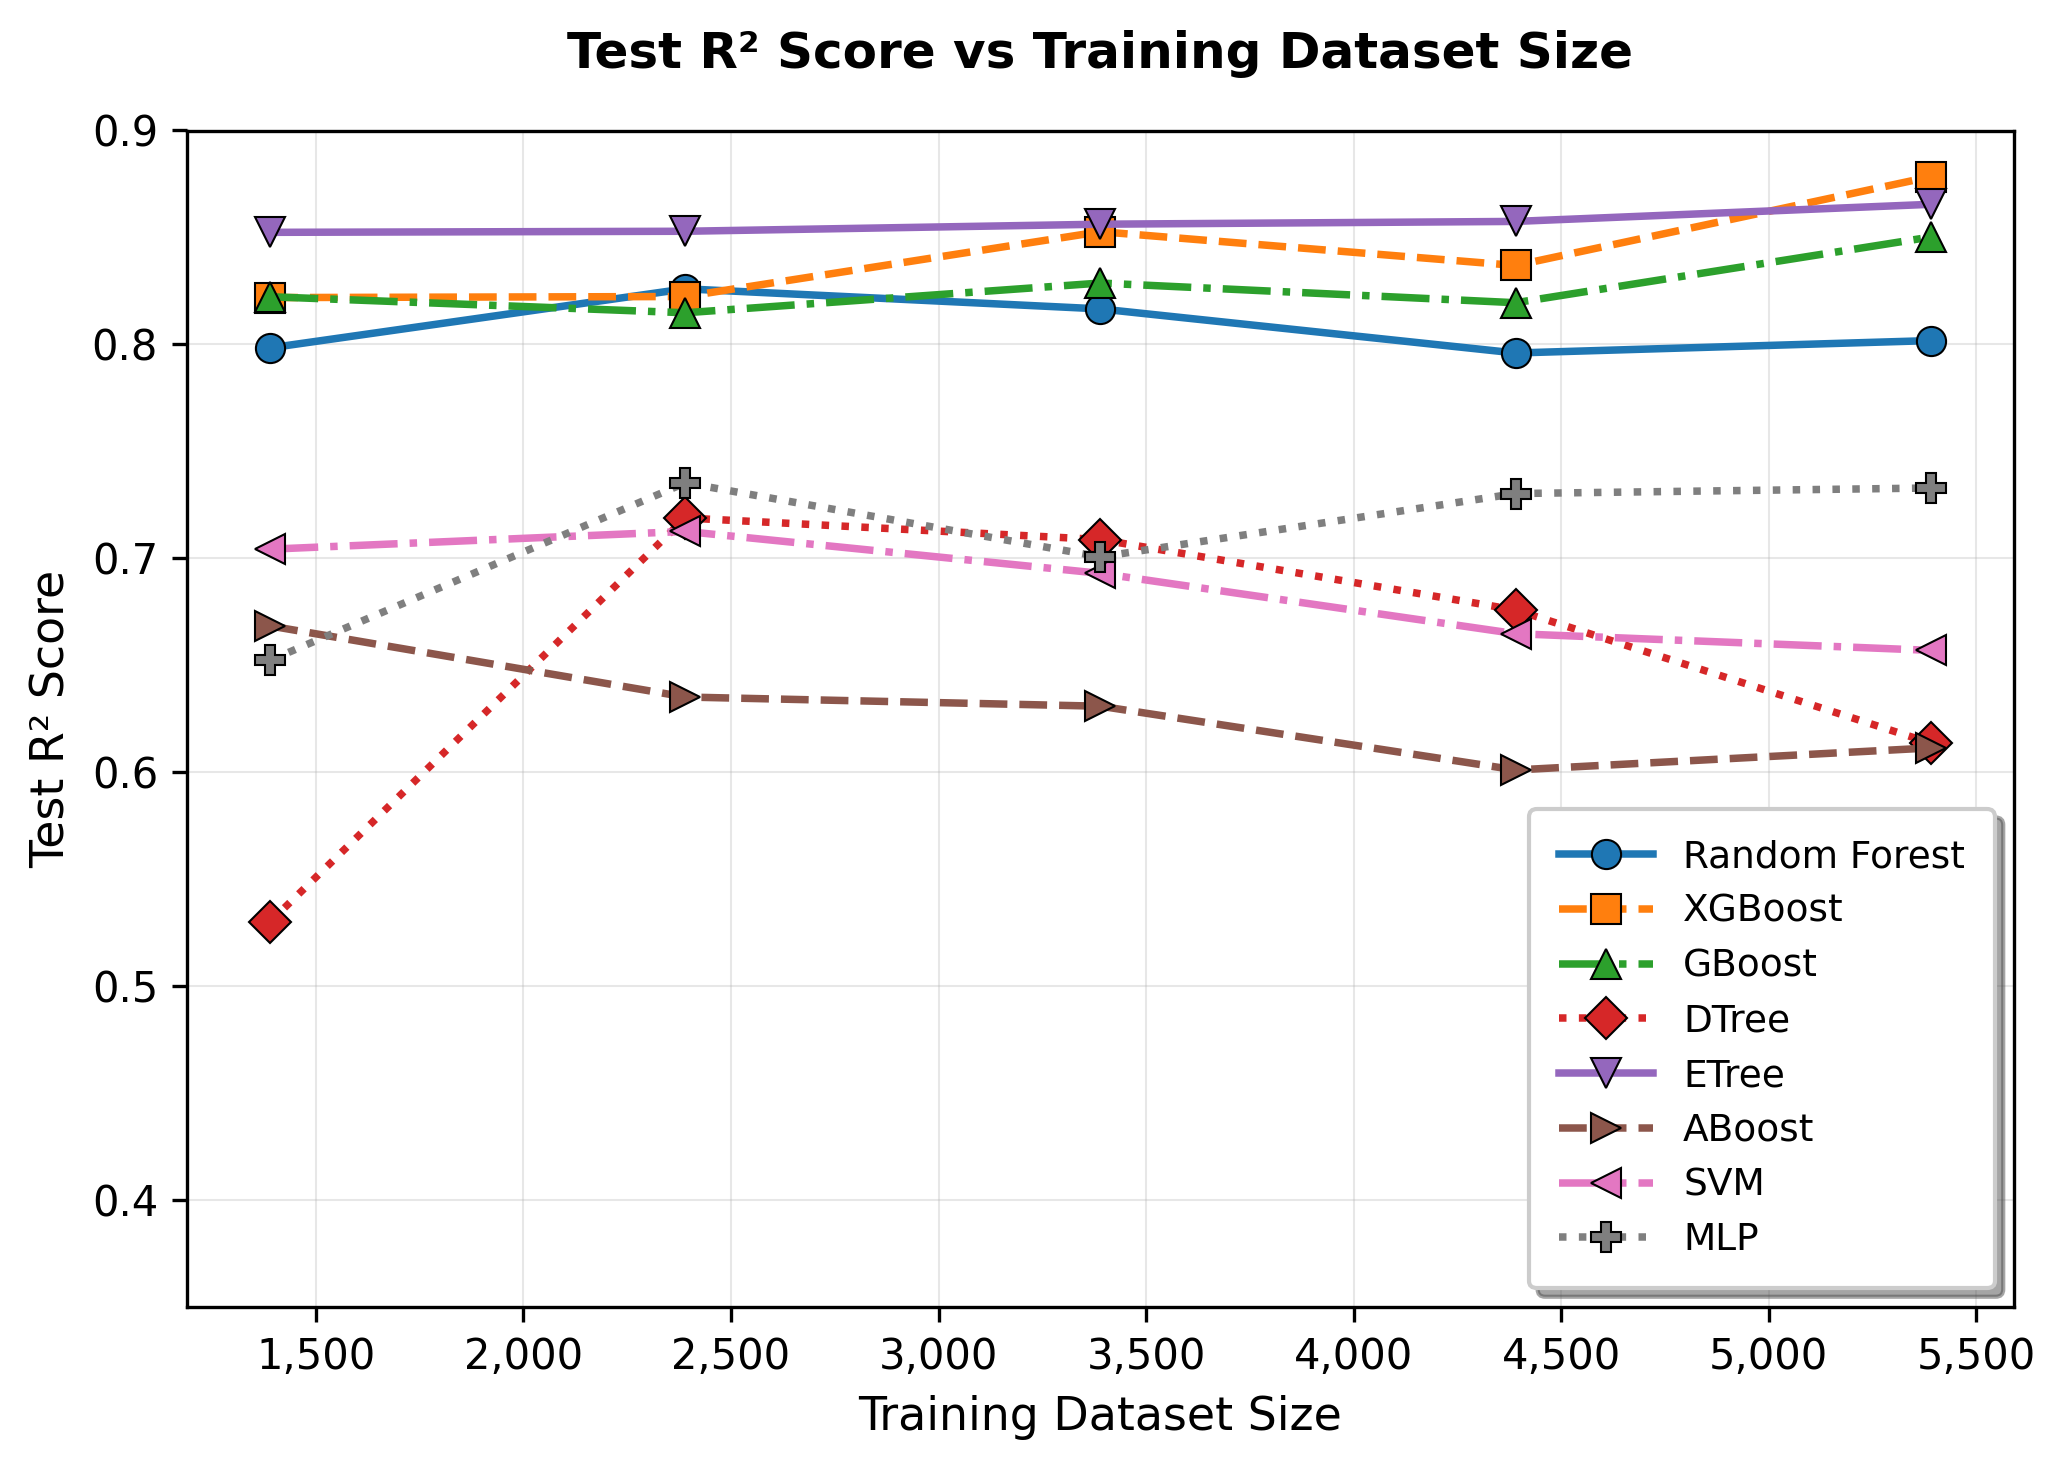

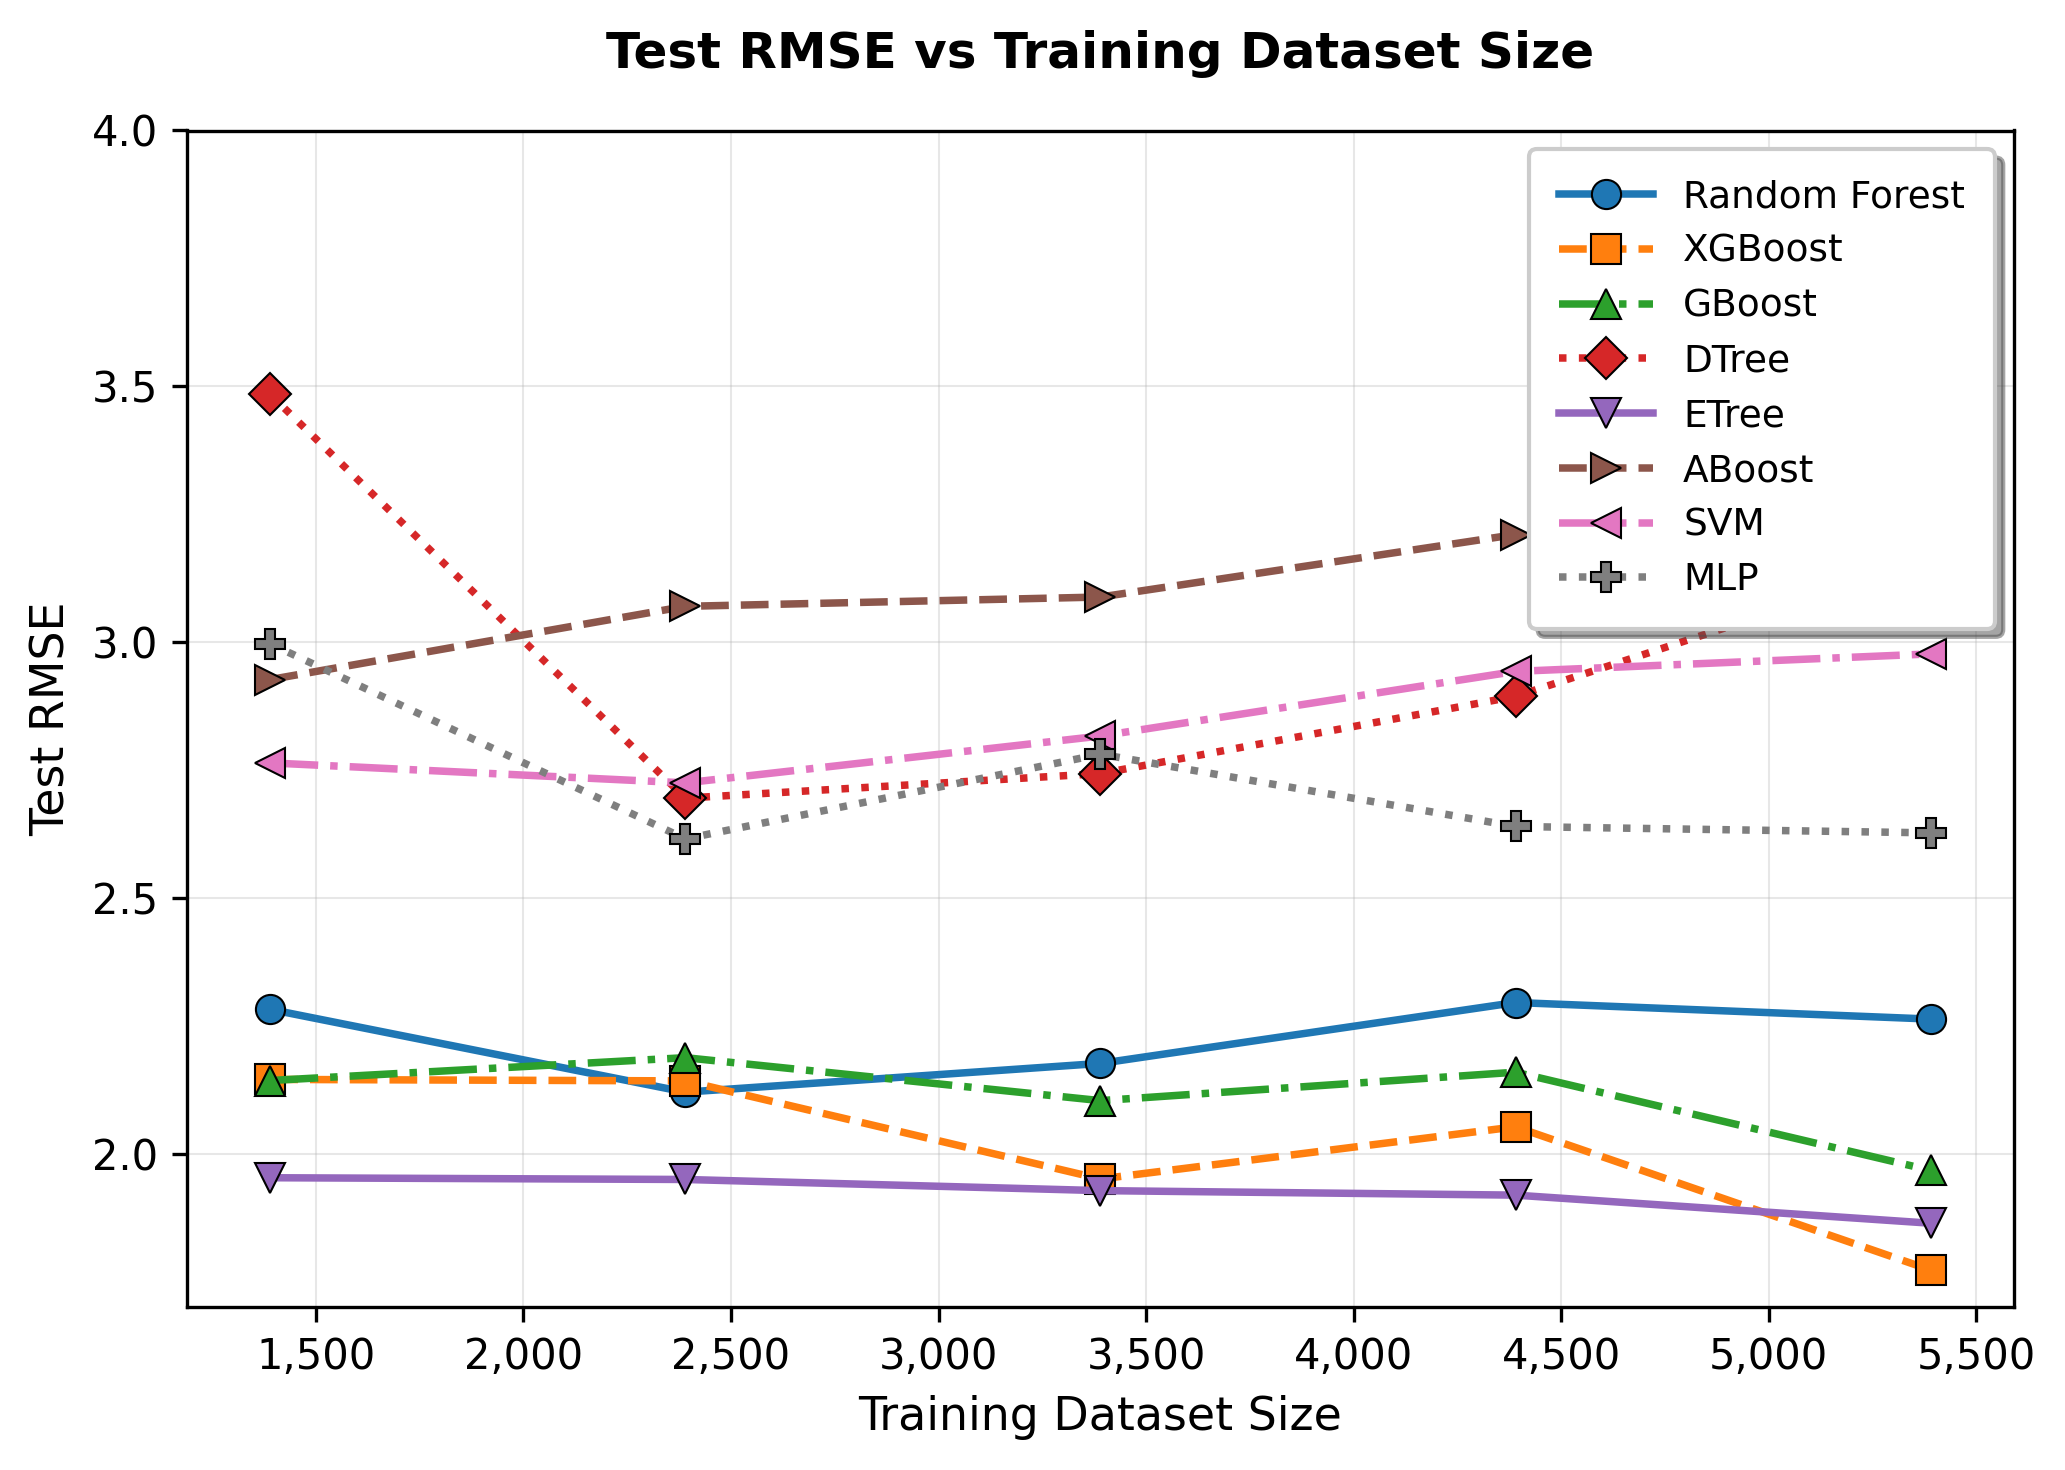

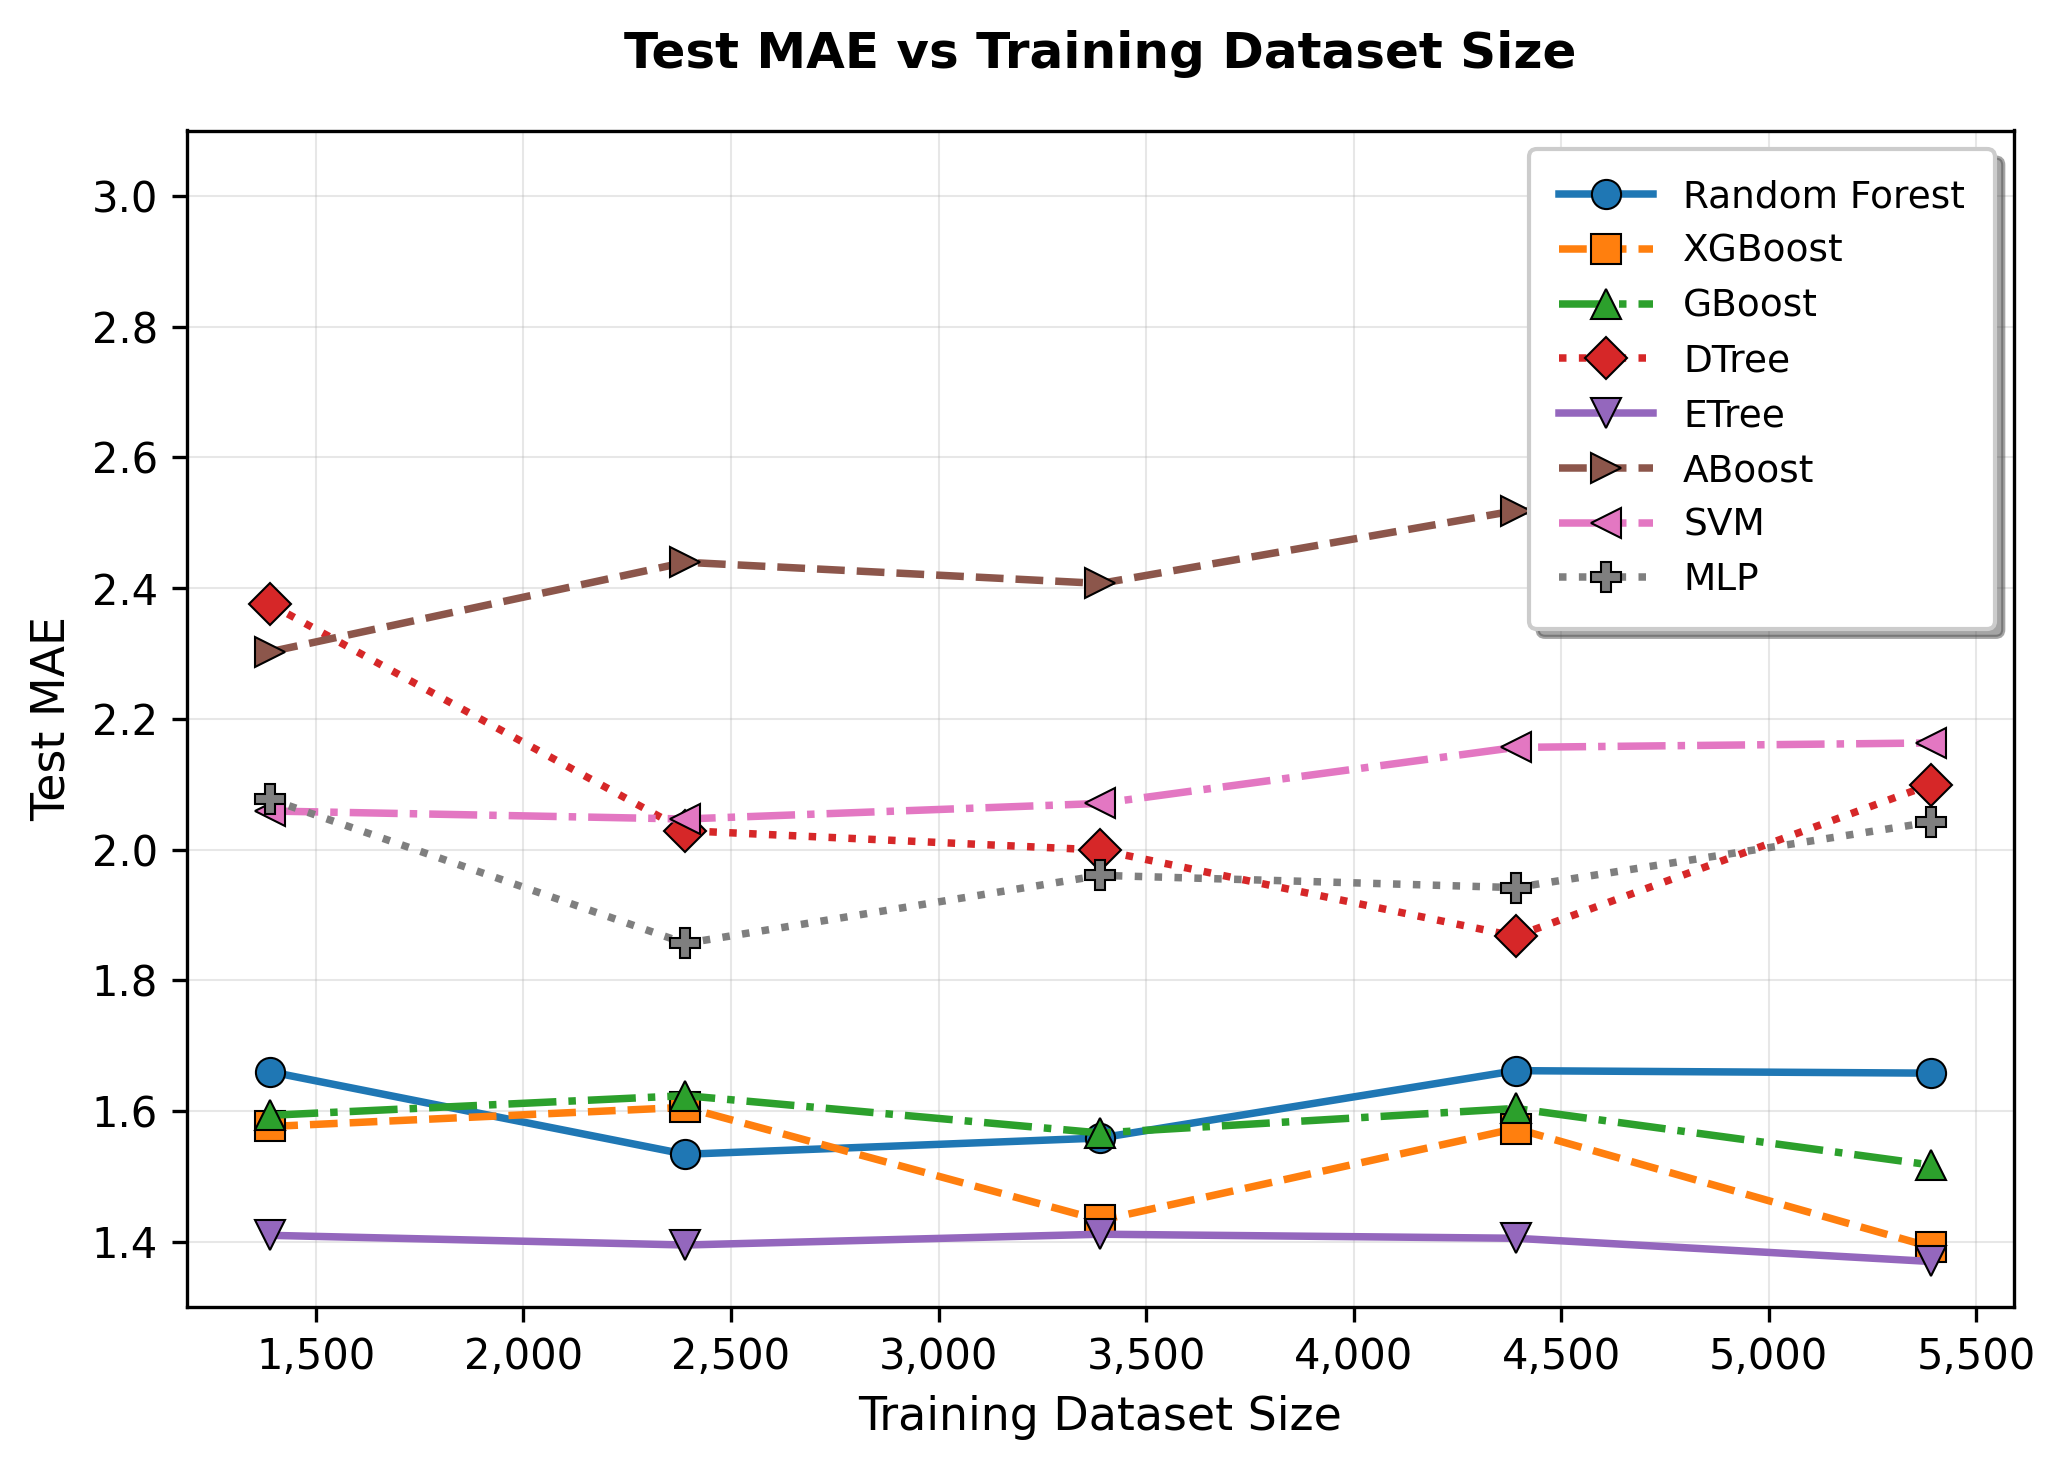

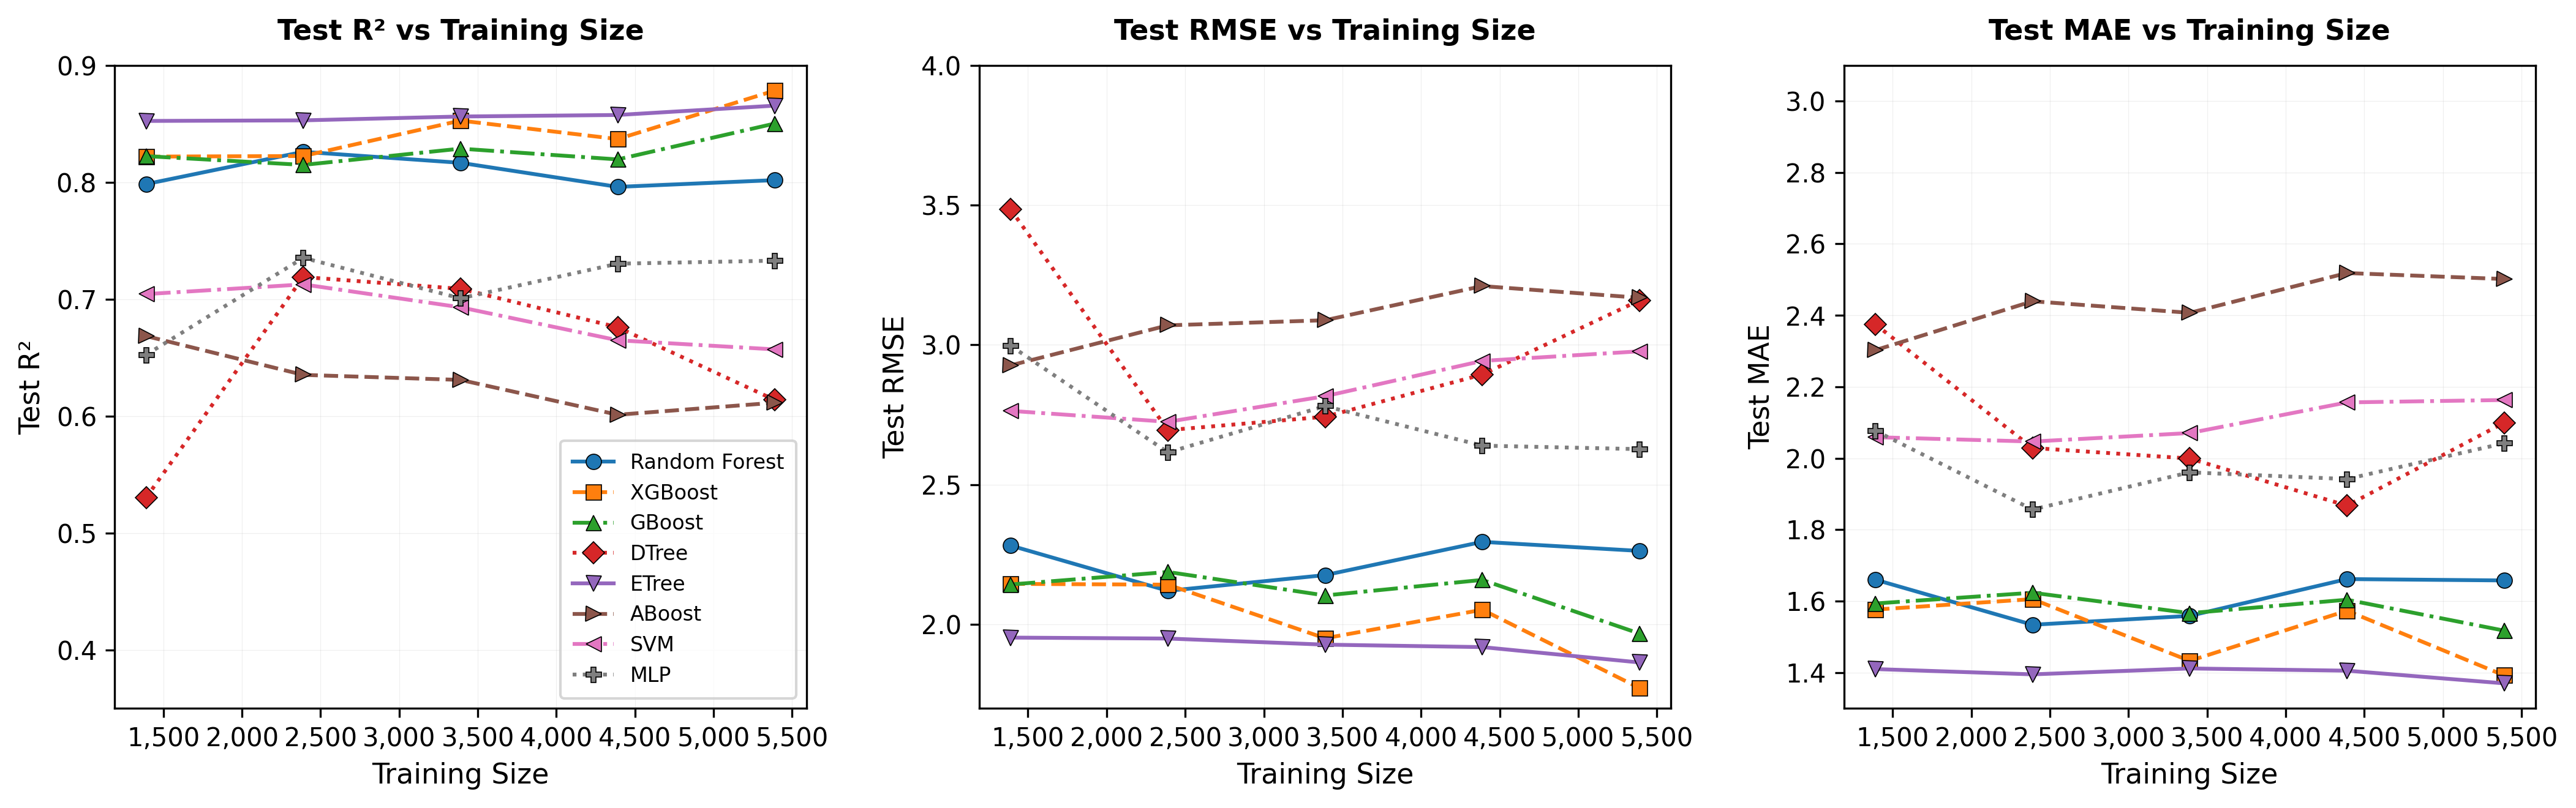

Average Performance Across All Training Sizes
    Model            R²             RMSE            MAE      
Random Forest 0.8078 ± 0.0116 2.2275 ± 0.0678 1.6145 ± 0.0562
      XGBoost 0.8425 ± 0.0212 2.0127 ± 0.1396 1.5161 ± 0.0863
       GBoost 0.8271 ± 0.0124 2.1122 ± 0.0773 1.5810 ± 0.0367
        DTree 0.6495 ± 0.0701 2.9950 ± 0.2932 2.0740 ± 0.1683
        ETree 0.8569 ± 0.0047 1.9227 ± 0.0320 1.3984 ± 0.0154
       ABoost 0.6294 ± 0.0232 3.0927 ± 0.0976 2.4339 ± 0.0771
          SVM 0.6863 ± 0.0218 2.8449 ± 0.0988 2.0992 ± 0.0500
          MLP 0.7103 ± 0.0316 2.7319 ± 0.1453 1.9756 ± 0.0778


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter

# Set high-quality plotting parameters
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['figure.figsize'] = [6.5, 4.5]


# Data Structure for your new results
results = {
    1390: {
        'Random Forest': {'Test R2': 0.7984, 'Test RMSE': 2.2821, 'Test MAE': 1.6601},
        'XGBoost': {'Test R2': 0.8219, 'Test RMSE': 2.1452, 'Test MAE': 1.5764},
        'GBoost': {'Test R2': 0.8223, 'Test RMSE': 2.1430, 'Test MAE': 1.5935},
        'DTree': {'Test R2': 0.5302, 'Test RMSE': 3.4840, 'Test MAE': 2.3751},
        'ETree': {'Test R2': 0.8524, 'Test RMSE': 1.9530, 'Test MAE': 1.4099},
        'ABoost': {'Test R2': 0.6684, 'Test RMSE': 2.9268, 'Test MAE': 2.3026},
        'SVM': {'Test R2': 0.7043, 'Test RMSE': 2.7639, 'Test MAE': 2.0590},
        'MLP': {'Test R2': 0.6524, 'Test RMSE': 2.9967, 'Test MAE': 2.0770}
    },
    2390: {
        'Random Forest': {'Test R2': 0.8260, 'Test RMSE': 2.1203, 'Test MAE': 1.5339},
        'XGBoost': {'Test R2': 0.8224, 'Test RMSE': 2.1423, 'Test MAE': 1.6057},
        'GBoost': {'Test R2': 0.8148, 'Test RMSE': 2.1877, 'Test MAE': 1.6236},
        'DTree': {'Test R2': 0.7189, 'Test RMSE': 2.6950, 'Test MAE': 2.0289},
        'ETree': {'Test R2': 0.8529, 'Test RMSE': 1.9496, 'Test MAE': 1.3951},
        'ABoost': {'Test R2': 0.6352, 'Test RMSE': 3.0699, 'Test MAE': 2.4395},
        'SVM': {'Test R2': 0.7126, 'Test RMSE': 2.7248, 'Test MAE': 2.0468},
        'MLP': {'Test R2': 0.7353, 'Test RMSE': 2.6154, 'Test MAE': 1.8565}
    },
    3390: {
        'Random Forest': {'Test R2': 0.8166, 'Test RMSE': 2.1765, 'Test MAE': 1.5588},
        'XGBoost': {'Test R2': 0.8527, 'Test RMSE': 1.9506, 'Test MAE': 1.4329},
        'GBoost': {'Test R2': 0.8287, 'Test RMSE': 2.1037, 'Test MAE': 1.5664},
        'DTree': {'Test R2': 0.7088, 'Test RMSE': 2.7430, 'Test MAE': 1.9993},
        'ETree': {'Test R2': 0.8562, 'Test RMSE': 1.9278, 'Test MAE': 1.4116},
        'ABoost': {'Test R2': 0.6309, 'Test RMSE': 3.0881, 'Test MAE': 2.4071},
        'SVM': {'Test R2': 0.6930, 'Test RMSE': 2.8164, 'Test MAE': 2.0706},
        'MLP': {'Test R2': 0.7007, 'Test RMSE': 2.7809, 'Test MAE': 1.9606}
    },
    4390: {
        'Random Forest': {'Test R2': 0.7960, 'Test RMSE': 2.2955, 'Test MAE': 1.6618},
        'XGBoost': {'Test R2': 0.8369, 'Test RMSE': 2.0526, 'Test MAE': 1.5733},
        'GBoost': {'Test R2': 0.8195, 'Test RMSE': 2.1593, 'Test MAE': 1.6040},
        'DTree': {'Test R2': 0.6759, 'Test RMSE': 2.8939, 'Test MAE': 1.8673},
        'ETree': {'Test R2': 0.8575, 'Test RMSE': 1.9190, 'Test MAE': 1.4054},
        'ABoost': {'Test R2': 0.6011, 'Test RMSE': 3.2103, 'Test MAE': 2.5185},
        'SVM': {'Test R2': 0.6648, 'Test RMSE': 2.9427, 'Test MAE': 2.1563},
        'MLP': {'Test R2': 0.7303, 'Test RMSE': 2.6396, 'Test MAE': 1.9418}
    },
    5390: {
        'Random Forest': {'Test R2': 0.8018, 'Test RMSE': 2.2631, 'Test MAE': 1.6580},
        'XGBoost': {'Test R2': 0.8784, 'Test RMSE': 1.7726, 'Test MAE': 1.3922},
        'GBoost': {'Test R2': 0.8502, 'Test RMSE': 1.9674, 'Test MAE': 1.5175},
        'DTree': {'Test R2': 0.6137, 'Test RMSE': 3.1593, 'Test MAE': 2.0995},
        'ETree': {'Test R2': 0.8655, 'Test RMSE': 1.8641, 'Test MAE': 1.3699},
        'ABoost': {'Test R2': 0.6114, 'Test RMSE': 3.1686, 'Test MAE': 2.5017},
        'SVM': {'Test R2': 0.6570, 'Test RMSE': 2.9769, 'Test MAE': 2.1631},
        'MLP': {'Test R2': 0.7329, 'Test RMSE': 2.6271, 'Test MAE': 2.0420}
    }
}





training_sizes = [1390, 2390, 3390, 4390, 5390]
model_names = ['Random Forest', 'XGBoost', 'GBoost', 'DTree', 'ETree', 'ABoost', 'SVM' ,'MLP']

model_colors = {
    'Random Forest': '#1f77b4',
    'XGBoost': '#ff7f0e',
    'GBoost': '#2ca02c',
    'DTree': '#d62728',
    'ETree': '#9467bd',
    'ABoost': '#8c564b',
    'SVM': '#e377c2',
    'MLP': '#7f7f7f'
}

line_styles = {
    'Random Forest': '-',
    'XGBoost': '--',
    'GBoost': '-.',
    'DTree': ':',
    'ETree': '-',
    'ABoost': '--',
    'SVM': '-.',
    'MLP': ':'
}

markers = {
    'Random Forest': 'o',
    'XGBoost': 's',
    'GBoost': '^',
    'DTree': 'D',
    'ETree': 'v',
    'ABoost': '>',
    'SVM': '<',
    'MLP': 'P'
}

# 1. R² Comparison Chart
fig1, ax1 = plt.subplots(figsize=(7, 5))

for model in model_names:
    r2_values = [results[size][model]['Test R2'] for size in training_sizes]
    ax1.plot(training_sizes, r2_values,
             color=model_colors[model],
             linestyle=line_styles[model],
             marker=markers[model],
             markersize=7,
             linewidth=1.8,
             label=model,
             markeredgecolor='black',
             markeredgewidth=0.5)

ax1.set_xlabel('Training Dataset Size', fontweight='medium')
ax1.set_ylabel('Test R² Score', fontweight='medium')
ax1.set_title('Test R² Score vs Training Dataset Size', fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_ylim(0.35, 0.90)
ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax1.legend(loc='lower right', frameon=True, fancybox=True, shadow=True,
           borderpad=0.8, handlelength=2.5, columnspacing=1.0)

plt.tight_layout()
plt.savefig('R2_vs_TrainingSize_Journal.png', dpi=600, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# 2. RMSE Comparison Chart
fig2, ax2 = plt.subplots(figsize=(7, 5))

for model in model_names:
    rmse_values = [results[size][model]['Test RMSE'] for size in training_sizes]
    ax2.plot(training_sizes, rmse_values,
             color=model_colors[model],
             linestyle=line_styles[model],
             marker=markers[model],
             markersize=7,
             linewidth=1.8,
             label=model,
             markeredgecolor='black',
             markeredgewidth=0.5)

ax2.set_xlabel('Training Dataset Size', fontweight='medium')
ax2.set_ylabel('Test RMSE', fontweight='medium')
ax2.set_title('Test RMSE vs Training Dataset Size', fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.set_ylim(1.7, 4.0)
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True,
           borderpad=0.8, handlelength=2.5, columnspacing=1.0)

plt.tight_layout()
plt.savefig('RMSE_vs_TrainingSize_Journal.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# 3. MAE Comparison Chart
fig3, ax3 = plt.subplots(figsize=(7, 5))

for model in model_names:
    mae_values = [results[size][model]['Test MAE'] for size in training_sizes]
    ax3.plot(training_sizes, mae_values,
             color=model_colors[model],
             linestyle=line_styles[model],
             marker=markers[model],
             markersize=7,
             linewidth=1.8,
             label=model,
             markeredgecolor='black',
             markeredgewidth=0.5)

ax3.set_xlabel('Training Dataset Size', fontweight='medium')
ax3.set_ylabel('Test MAE', fontweight='medium')
ax3.set_title('Test MAE vs Training Dataset Size', fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax3.set_ylim(1.3, 3.1)
ax3.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax3.legend(loc='upper right', frameon=True, fancybox=True, shadow=True,
           borderpad=0.8, handlelength=2.5, columnspacing=1.0)

plt.tight_layout()
plt.savefig('MAE_vs_TrainingSize_Journal.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# 4. Multi-panel figure for publication
fig4, axes = plt.subplots(1, 3, figsize=(14, 4.5), sharex=True)

metrics_data = [
    ('Test R²', 'Test R2', 0.35, 0.90, 'lower right'),
    ('Test RMSE', 'Test RMSE', 1.7, 4.0, 'upper right'),
    ('Test MAE', 'Test MAE', 1.3, 3.1, 'upper right')
]

for idx, (metric_label, metric_key, y_min, y_max, legend_loc) in enumerate(metrics_data):
    ax = axes[idx]
    
    for model in model_names:
        values = [results[size][model][metric_key] for size in training_sizes]
        ax.plot(training_sizes, values,
                color=model_colors[model],
                linestyle=line_styles[model],
                marker=markers[model],
                markersize=6,
                linewidth=1.5,
                label=model,
                markeredgecolor='black',
                markeredgewidth=0.4)
    
    ax.set_xlabel('Training Size', fontweight='medium')
    ax.set_ylabel(metric_label, fontweight='medium')
    ax.set_title(f'{metric_label} vs Training Size', fontweight='bold', pad=10, fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.3)
    ax.set_ylim(y_min, y_max)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    if idx == 0:
        ax.legend(loc=legend_loc, fontsize=8, frameon=True, fancybox=True,
                  shadow=False, borderpad=0.6, handlelength=2.0)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.savefig('MultiPanel_Performance_Journal.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# Performance table
print("Average Performance Across All Training Sizes")
print("="*70)

table_data = []
for model in model_names:
    avg_r2 = np.mean([results[size][model]['Test R2'] for size in training_sizes])
    avg_rmse = np.mean([results[size][model]['Test RMSE'] for size in training_sizes])
    avg_mae = np.mean([results[size][model]['Test MAE'] for size in training_sizes])
    
    std_r2 = np.std([results[size][model]['Test R2'] for size in training_sizes])
    std_rmse = np.std([results[size][model]['Test RMSE'] for size in training_sizes])
    std_mae = np.std([results[size][model]['Test MAE'] for size in training_sizes])
    
    table_data.append({
        'Model': model,
        'R²': f'{avg_r2:.4f} ± {std_r2:.4f}',
        'RMSE': f'{avg_rmse:.4f} ± {std_rmse:.4f}',
        'MAE': f'{avg_mae:.4f} ± {std_mae:.4f}'
    })

df = pd.DataFrame(table_data)
print(df.to_string(index=False, justify='center'))

# NN_models


# Result for 1390 datapoints

In [ ]:
data = pd.read_excel('1390_train_data.xlsx')
df = pd.DataFrame(data)
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1390, 24) (1390,)


In [14]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

In [15]:
# NN_training

for name, model in nn_models.items():
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=get_callbacks(name),
        verbose=0
    )

    y_train_pred = model.predict(X_train_scaled).flatten()
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled).flatten()
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }


    results[name] = {**train_metrics, **test_metrics}
    
    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{name} - Learning Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['r_squared'], label='Train R²')
    ax2.plot(history.history['val_r_squared'], label='Validation R²')
    ax2.set_title(f'{name} - R² Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R²')
    ax2.legend()

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax3)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title(f'{name} - Actual vs Predicted')

    plt.tight_layout()
    plt.close()


5/5 [==============================] - 0s 625us/step

Model: Simple NN
Train RMSE: 3.6168
Train MAE: 2.5258
Train R2: 0.5938
Train Explained Variance: 0.5940
Test RMSE: 3.8681
Test MAE: 2.9670
Test R2: 0.4209
Test Explained Variance: 0.4610
5/5 [==============================] - 0s 750us/step

Model: Deep NN
Train RMSE: 2.3979
Train MAE: 1.6005
Train R2: 0.8214
Train Explained Variance: 0.8215
Test RMSE: 3.6783
Test MAE: 2.0381
Test R2: 0.4763
Test Explained Variance: 0.5061
5/5 [==============================] - 0s 2ms/step

Model: Residual NN
Train RMSE: 2.6776
Train MAE: 1.8651
Train R2: 0.7774
Train Explained Variance: 0.7775
Test RMSE: 2.3643
Test MAE: 1.8644
Test R2: 0.7836
Test Explained Variance: 0.8095
5/5 [==============================] - 0s 5ms/step

Model: Attention NN
Train RMSE: 3.8396
Train MAE: 2.8733
Train R2: 0.5422
Train Explained Variance: 0.6181
Test RMSE: 3.5831
Test MAE: 2.8383
Test R2: 0.5031
Test Explained Variance: 0.5110
5/5 [==============================] 

# Result for 2390 datapoints

In [16]:
data = pd.read_excel('2390_datapoints.xlsx')
data[data<0] = 0
df = pd.DataFrame(data)
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(2390, 24) (2390,)


In [17]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

In [18]:
# NN_training

for name, model in nn_models.items():
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=get_callbacks(name),
        verbose=0
    )

    y_train_pred = model.predict(X_train_scaled).flatten()
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled).flatten()
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }


    results[name] = {**train_metrics, **test_metrics}
    
    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{name} - Learning Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['r_squared'], label='Train R²')
    ax2.plot(history.history['val_r_squared'], label='Validation R²')
    ax2.set_title(f'{name} - R² Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R²')
    ax2.legend()

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax3)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title(f'{name} - Actual vs Predicted')

    plt.tight_layout()
    plt.close()


5/5 [==============================] - 0s 673us/step

Model: Simple NN
Train RMSE: 1.5703
Train MAE: 1.1289
Train R2: 0.9228
Train Explained Variance: 0.9228
Test RMSE: 2.6837
Test MAE: 1.7682
Test R2: 0.7212
Test Explained Variance: 0.7222
5/5 [==============================] - 0s 1ms/step

Model: Deep NN
Train RMSE: 1.5061
Train MAE: 1.0986
Train R2: 0.9290
Train Explained Variance: 0.9292
Test RMSE: 2.2672
Test MAE: 1.6231
Test R2: 0.8011
Test Explained Variance: 0.8210
5/5 [==============================] - 0s 2ms/step

Model: Residual NN
Train RMSE: 1.5147
Train MAE: 1.0798
Train R2: 0.9282
Train Explained Variance: 0.9313
Test RMSE: 2.1058
Test MAE: 1.7173
Test R2: 0.8284
Test Explained Variance: 0.8290
5/5 [==============================] - 0s 2ms/step

Model: Attention NN
Train RMSE: 2.7973
Train MAE: 2.1186
Train R2: 0.7551
Train Explained Variance: 0.8029
Test RMSE: 2.6570
Test MAE: 2.1680
Test R2: 0.7268
Test Explained Variance: 0.7855
5/5 [==============================] - 

# Result for 3390 datapoints

In [19]:
data = pd.read_excel('3390_datapoints.xlsx')
data[data<0] = 0
df = pd.DataFrame(data)
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(3390, 24) (3390,)


In [20]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

In [21]:
# NN_training

for name, model in nn_models.items():
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=get_callbacks(name),
        verbose=0
    )

    y_train_pred = model.predict(X_train_scaled).flatten()
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled).flatten()
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }


    results[name] = {**train_metrics, **test_metrics}
    
    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{name} - Learning Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['r_squared'], label='Train R²')
    ax2.plot(history.history['val_r_squared'], label='Validation R²')
    ax2.set_title(f'{name} - R² Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R²')
    ax2.legend()

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax3)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title(f'{name} - Actual vs Predicted')

    plt.tight_layout()
    plt.close()


5/5 [==============================] - 0s 751us/step

Model: Simple NN
Train RMSE: 1.3623
Train MAE: 0.9646
Train R2: 0.9410
Train Explained Variance: 0.9410
Test RMSE: 2.5932
Test MAE: 1.8941
Test R2: 0.7397
Test Explained Variance: 0.7405
5/5 [==============================] - 0s 750us/step

Model: Deep NN
Train RMSE: 1.3029
Train MAE: 0.9262
Train R2: 0.9460
Train Explained Variance: 0.9460
Test RMSE: 2.1967
Test MAE: 1.7464
Test R2: 0.8132
Test Explained Variance: 0.8223
5/5 [==============================] - 0s 1ms/step

Model: Residual NN
Train RMSE: 1.3235
Train MAE: 0.9072
Train R2: 0.9443
Train Explained Variance: 0.9485
Test RMSE: 2.0550
Test MAE: 1.6613
Test R2: 0.8366
Test Explained Variance: 0.8375
5/5 [==============================] - 0s 4ms/step

Model: Attention NN
Train RMSE: 3.1892
Train MAE: 2.4833
Train R2: 0.6765
Train Explained Variance: 0.7874
Test RMSE: 2.7485
Test MAE: 2.1476
Test R2: 0.7076
Test Explained Variance: 0.7548
5/5 [==============================] 

# Result for 4390 datapoints

In [7]:
data = pd.read_excel('4390_datapoints.xlsx')
data[data<0] = 0
df = pd.DataFrame(data)
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(4390, 24) (4390,)


In [ ]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

In [10]:
# NN_training

for name, model in nn_models.items():
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=get_callbacks(name),
        verbose=0
    )

    y_train_pred = model.predict(X_train_scaled).flatten()
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled).flatten()
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }


    results[name] = {**train_metrics, **test_metrics}
    
    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{name} - Learning Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['r_squared'], label='Train R²')
    ax2.plot(history.history['val_r_squared'], label='Validation R²')
    ax2.set_title(f'{name} - R² Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R²')
    ax2.legend()

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax3)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title(f'{name} - Actual vs Predicted')

    plt.tight_layout()
    plt.close()


5/5 [==============================] - 0s 625us/step

Model: Simple NN
Train RMSE: 1.3774
Train MAE: 0.9666
Train R2: 0.9387
Train Explained Variance: 0.9387
Test RMSE: 2.6269
Test MAE: 1.8388
Test R2: 0.7329
Test Explained Variance: 0.7336
5/5 [==============================] - 0s 625us/step

Model: Deep NN
Train RMSE: 1.4502
Train MAE: 1.0486
Train R2: 0.9320
Train Explained Variance: 0.9322
Test RMSE: 2.0254
Test MAE: 1.5800
Test R2: 0.8412
Test Explained Variance: 0.8466
5/5 [==============================] - 0s 875us/step

Model: Residual NN
Train RMSE: 1.2516
Train MAE: 0.8560
Train R2: 0.9494
Train Explained Variance: 0.9527
Test RMSE: 2.0745
Test MAE: 1.6794
Test R2: 0.8334
Test Explained Variance: 0.8348
5/5 [==============================] - 0s 3ms/step

Model: Attention NN
Train RMSE: 1.8370
Train MAE: 1.2554
Train R2: 0.8909
Train Explained Variance: 0.8930
Test RMSE: 2.2997
Test MAE: 1.7410
Test R2: 0.7953
Test Explained Variance: 0.7974
5/5 [==============================

# Result for 5390 datapoints

In [22]:
data = pd.read_excel('5390_datapoints.xlsx')
data[data<0] = 0
df = pd.DataFrame(data)
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(5390, 24) (5390,)


In [23]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

In [24]:
# NN_training

for name, model in nn_models.items():
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=get_callbacks(name),
        verbose=0
    )

    y_train_pred = model.predict(X_train_scaled).flatten()
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled).flatten()
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }


    results[name] = {**train_metrics, **test_metrics}
    
    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{name} - Learning Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['r_squared'], label='Train R²')
    ax2.plot(history.history['val_r_squared'], label='Validation R²')
    ax2.set_title(f'{name} - R² Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R²')
    ax2.legend()

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax3)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title(f'{name} - Actual vs Predicted')

    plt.tight_layout()
    plt.close()


5/5 [==============================] - 0s 627us/step

Model: Simple NN
Train RMSE: 1.0762
Train MAE: 0.7392
Train R2: 0.9624
Train Explained Variance: 0.9625
Test RMSE: 2.3717
Test MAE: 1.7599
Test R2: 0.7823
Test Explained Variance: 0.7862
5/5 [==============================] - 0s 750us/step

Model: Deep NN
Train RMSE: 1.2691
Train MAE: 0.8471
Train R2: 0.9477
Train Explained Variance: 0.9477
Test RMSE: 2.6847
Test MAE: 1.9465
Test R2: 0.7210
Test Explained Variance: 0.7387
5/5 [==============================] - 0s 1ms/step

Model: Residual NN
Train RMSE: 1.1315
Train MAE: 0.7686
Train R2: 0.9584
Train Explained Variance: 0.9609
Test RMSE: 2.1502
Test MAE: 1.6842
Test R2: 0.8211
Test Explained Variance: 0.8220
5/5 [==============================] - 0s 3ms/step

Model: Attention NN
Train RMSE: 2.1187
Train MAE: 1.5518
Train R2: 0.8543
Train Explained Variance: 0.8729
Test RMSE: 2.5370
Test MAE: 1.9407
Test R2: 0.7509
Test Explained Variance: 0.7644
5/5 [==============================] 

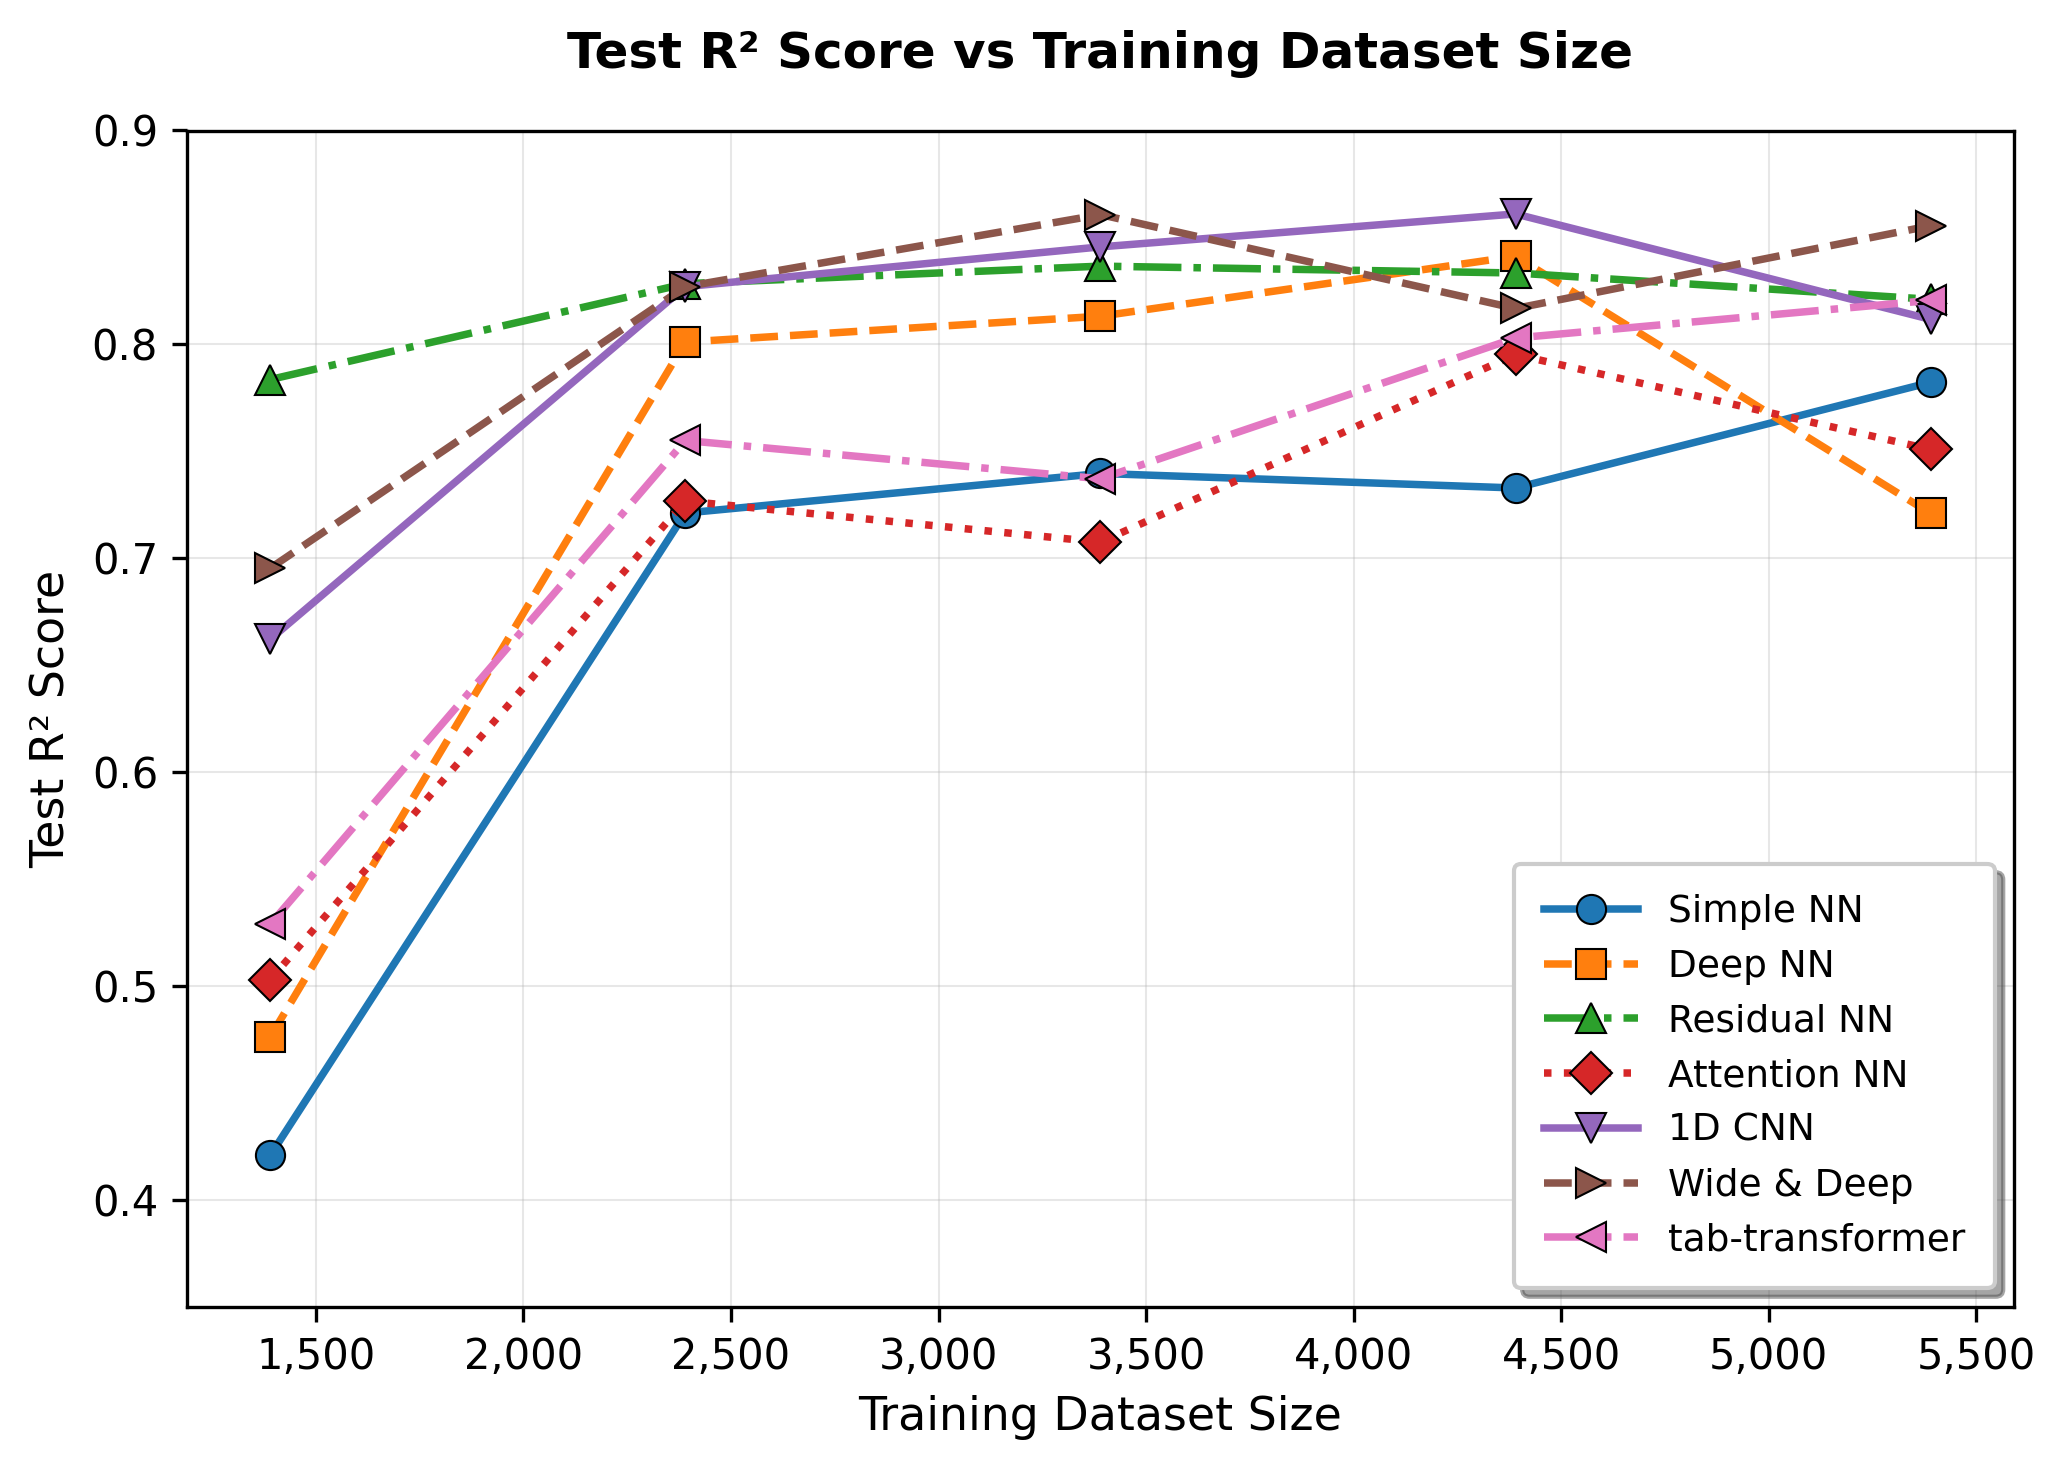

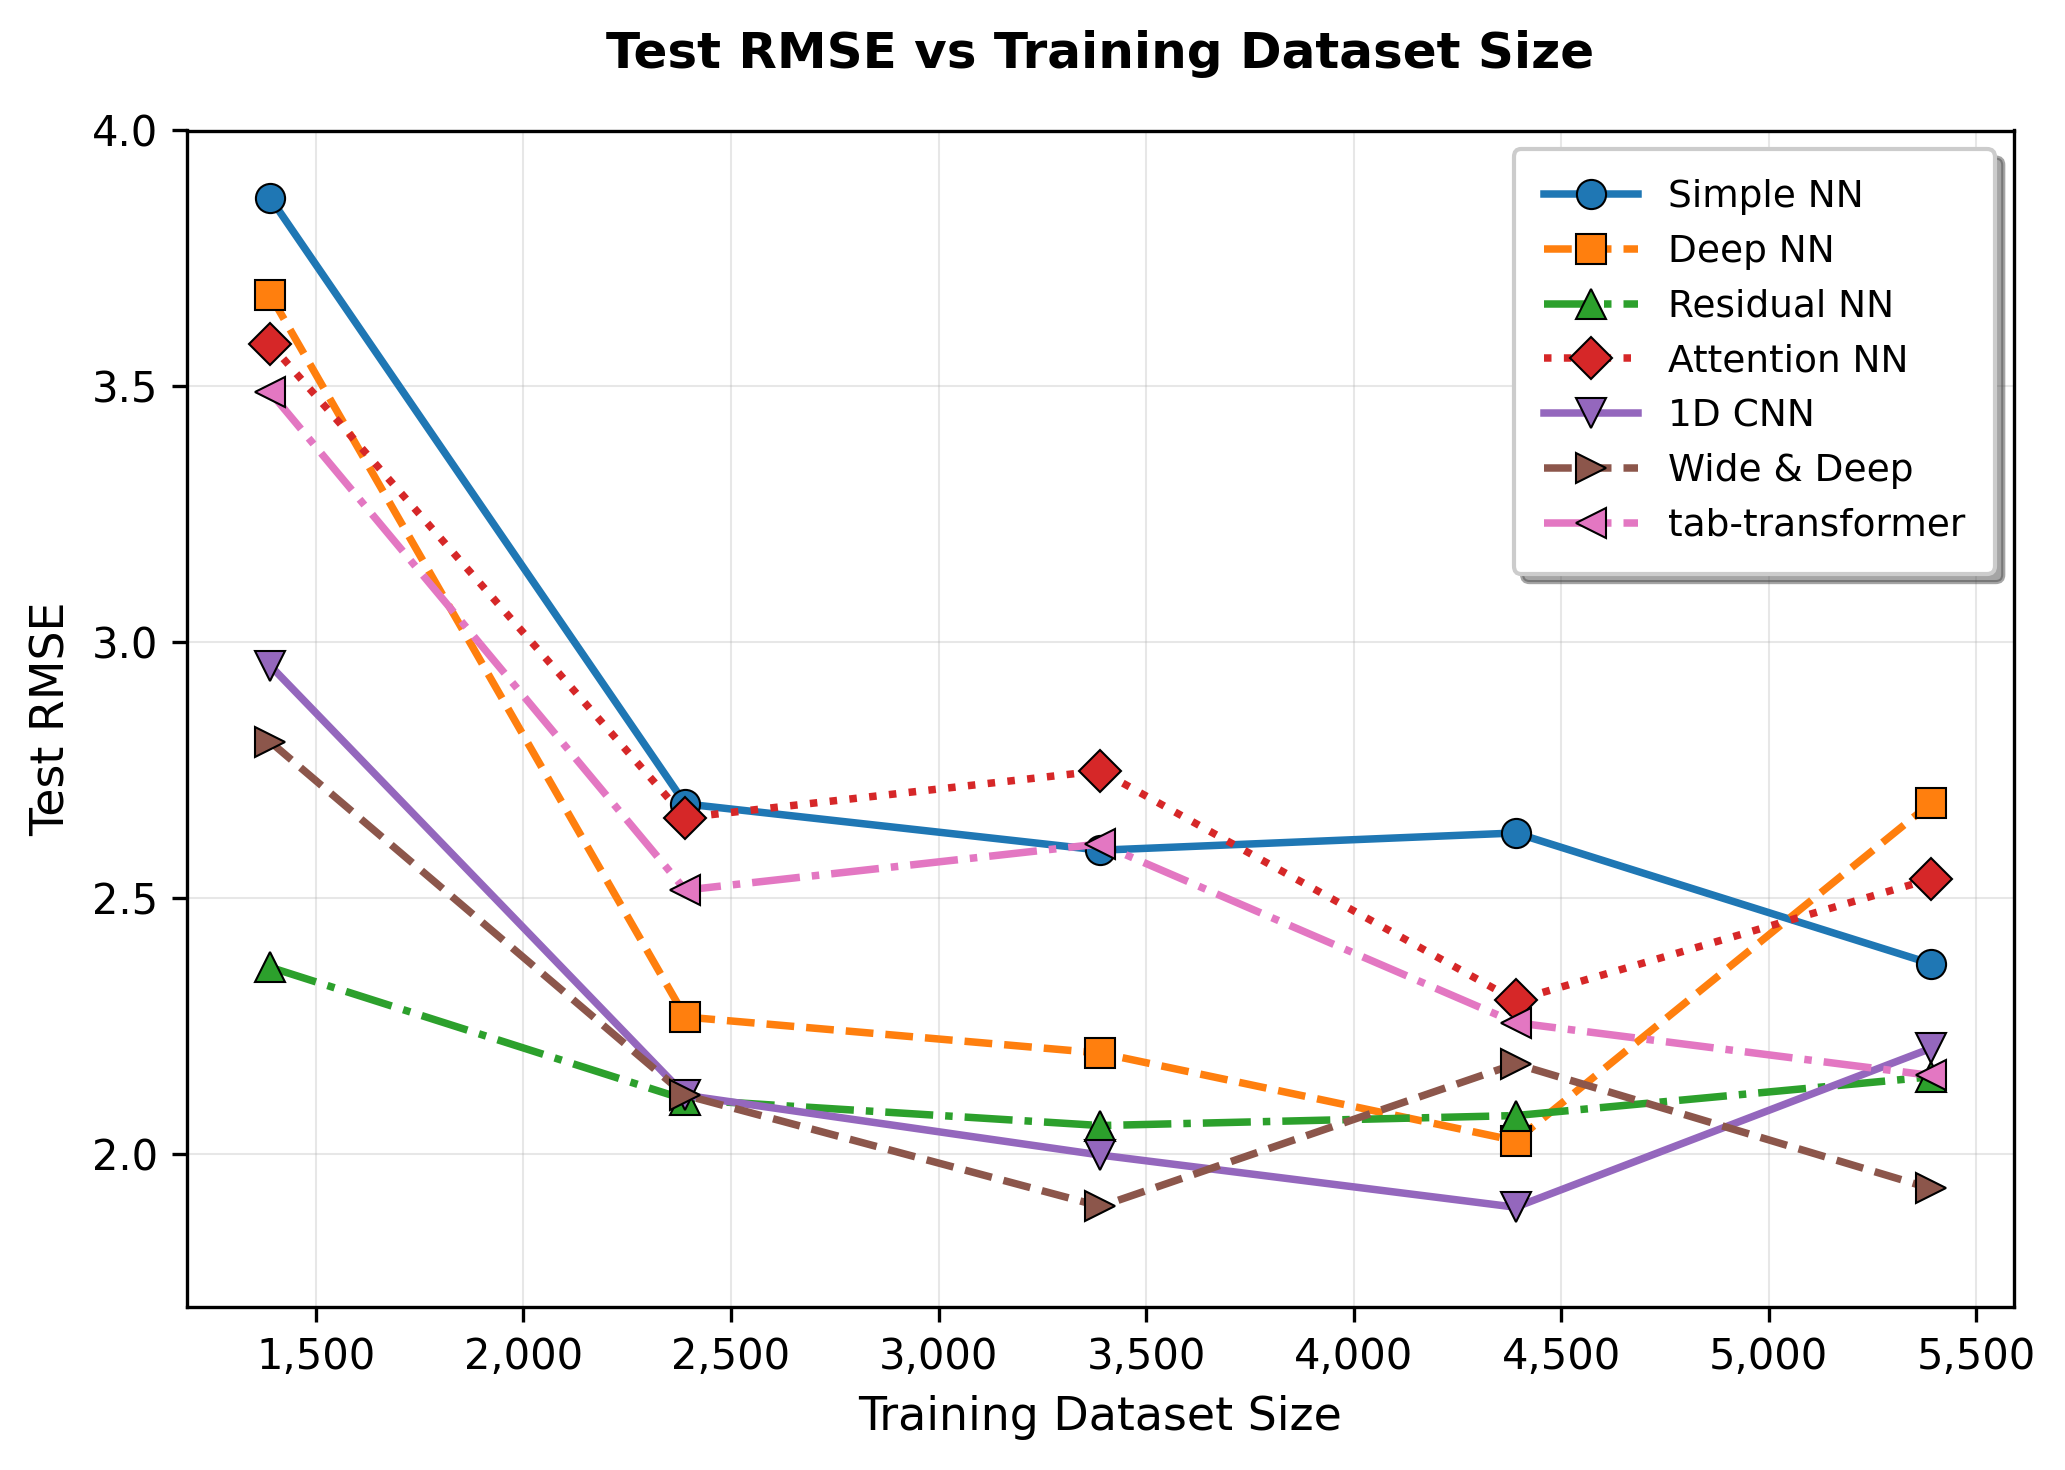

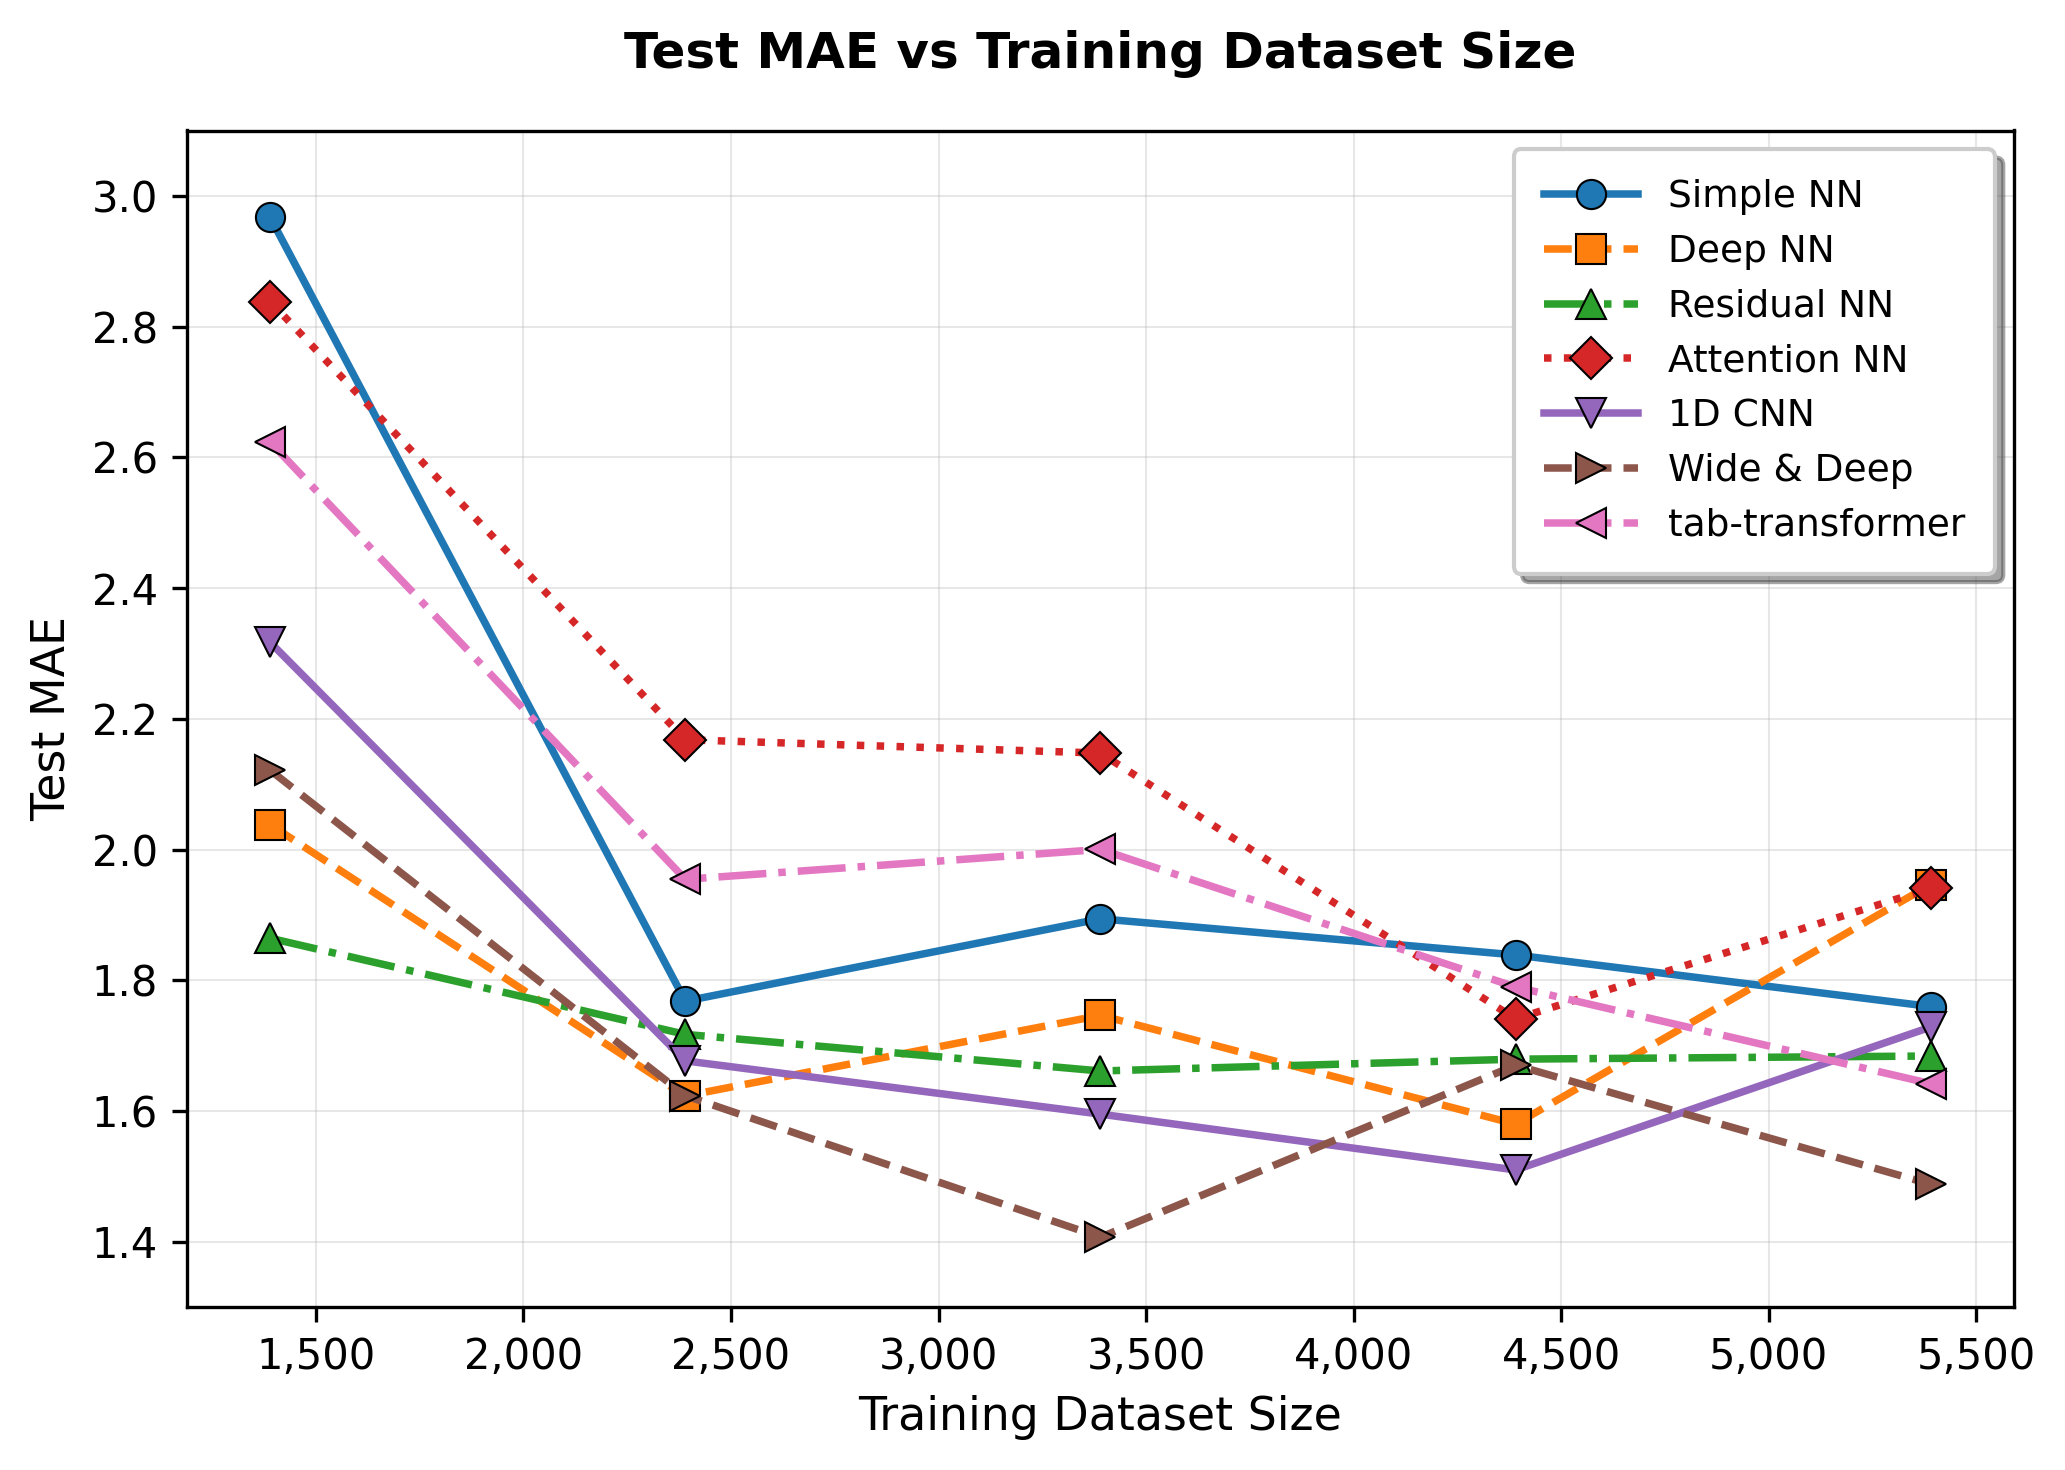

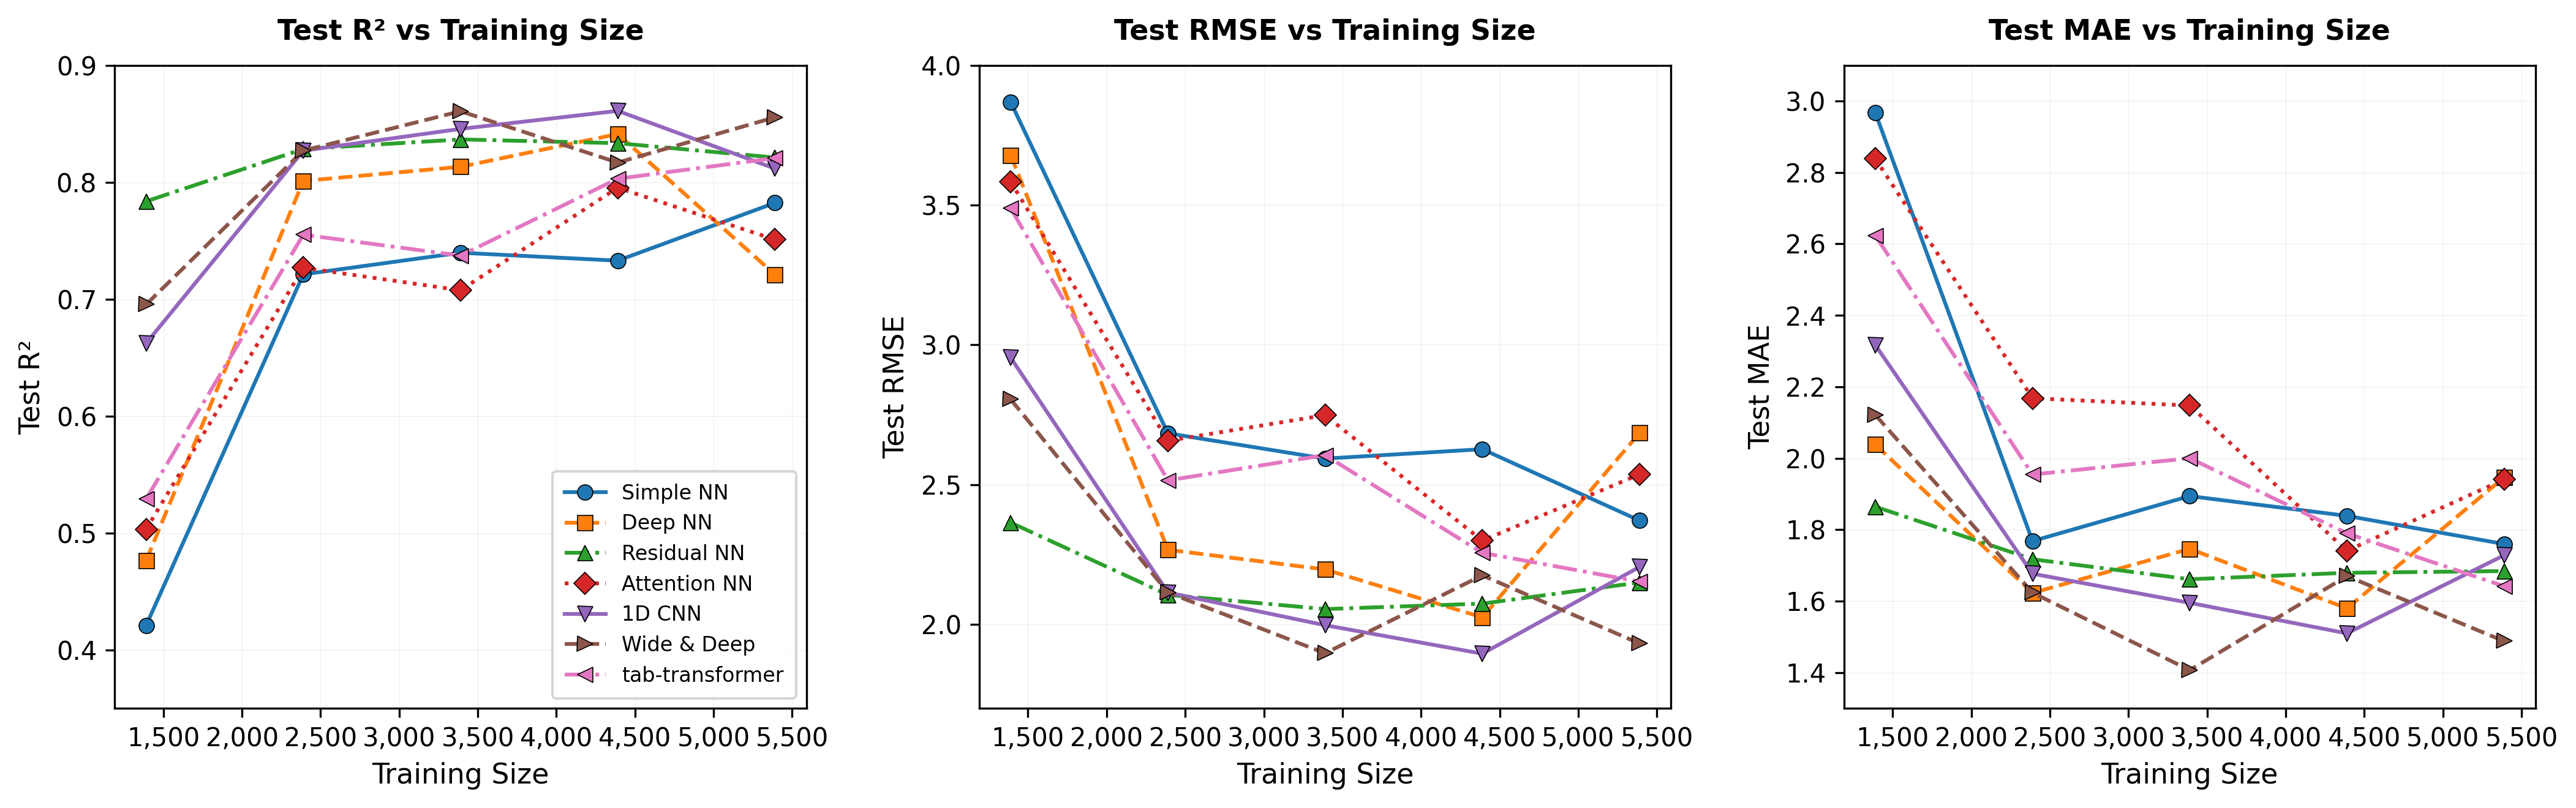

Average Performance Across All Training Sizes
     Model             R²             RMSE            MAE      
      Simple NN 0.6794 ± 0.1309 2.8287 ± 0.5304 2.0456 ± 0.4633
        Deep NN 0.7306 ± 0.1333 2.5705 ± 0.5948 1.7868 ± 0.1788
    Residual NN 0.8206 ± 0.0192 2.1500 ± 0.1119 1.7213 ± 0.0738
   Attention NN 0.6967 ± 0.1012 2.7651 ± 0.4358 2.1671 ± 0.3698
         1D CNN 0.8015 ± 0.0716 2.2333 ± 0.3753 1.7655 ± 0.2855
    Wide & Deep 0.8111 ± 0.0602 2.1848 ± 0.3276 1.6620 ± 0.2481
tab-transformer 0.7290 ± 0.1045 2.6037 ± 0.4722 2.0019 ± 0.3355


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter

# Set high-quality plotting parameters
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['figure.figsize'] = [6.5, 4.5]


# Data Structure for your new results
results = {
    1390: {
        'Simple NN': {'Test R2': 0.4209, 'Test RMSE': 3.8681, 'Test MAE': 2.9670},
        'Deep NN': {'Test R2': 0.4763, 'Test RMSE': 3.6783, 'Test MAE': 2.0381},
        'Residual NN': {'Test R2': 0.7836, 'Test RMSE': 2.3643, 'Test MAE': 1.8644},
        'Attention NN': {'Test R2': 0.5031, 'Test RMSE': 3.5831, 'Test MAE': 2.8383},
        '1D CNN': {'Test R2': 0.6622, 'Test RMSE': 2.9540, 'Test MAE': 2.3169},
        'Wide & Deep': {'Test R2': 0.6954, 'Test RMSE': 2.8051, 'Test MAE': 2.1213},
        'tab-transformer': {'Test R2': 0.5290, 'Test RMSE': 3.4886, 'Test MAE': 2.6232}
    },
    2390: {
        'Simple NN': {'Test R2': 0.7212, 'Test RMSE': 2.6837, 'Test MAE': 1.7682},
        'Deep NN': {'Test R2': 0.8011, 'Test RMSE': 2.2672, 'Test MAE': 1.6231},
        'Residual NN': {'Test R2': 0.8284, 'Test RMSE': 2.1058, 'Test MAE': 1.7173},
        'Attention NN': {'Test R2': 0.7268, 'Test RMSE': 2.6570, 'Test MAE': 2.1680},
        '1D CNN': {'Test R2': 0.8270, 'Test RMSE': 2.1142, 'Test MAE': 1.6768},
        'Wide & Deep': {'Test R2': 0.8270, 'Test RMSE': 2.1142, 'Test MAE': 1.6236},
        'tab-transformer': {'Test R2': 0.7551, 'Test RMSE': 2.5153, 'Test MAE': 1.9545}
    },
    3390: {
        'Simple NN': {'Test R2': 0.7397, 'Test RMSE': 2.5932, 'Test MAE': 1.8941},
        'Deep NN': {'Test R2': 0.8132, 'Test RMSE': 2.1967, 'Test MAE': 1.7464},
        'Residual NN': {'Test R2': 0.8366, 'Test RMSE': 2.0550, 'Test MAE': 1.6613},
        'Attention NN': {'Test R2': 0.7076, 'Test RMSE': 2.7485, 'Test MAE': 2.1476},
        '1D CNN': {'Test R2': 0.8456, 'Test RMSE': 1.9973, 'Test MAE': 1.5953},
        'Wide & Deep': {'Test R2': 0.8607, 'Test RMSE': 1.8970, 'Test MAE': 1.4069},
        'tab-transformer': {'Test R2': 0.7372, 'Test RMSE': 2.6056, 'Test MAE': 2.0002}
    },
    4390: {
        'Simple NN': {'Test R2': 0.7329, 'Test RMSE': 2.6269, 'Test MAE': 1.8388},
        'Deep NN': {'Test R2': 0.8412, 'Test RMSE': 2.0254, 'Test MAE': 1.5800},
        'Residual NN': {'Test R2': 0.8334, 'Test RMSE': 2.0745, 'Test MAE': 1.6794},
        'Attention NN': {'Test R2': 0.7953, 'Test RMSE': 2.2997, 'Test MAE': 1.7410},
        '1D CNN': {'Test R2': 0.8610, 'Test RMSE': 1.8954, 'Test MAE': 1.5099},
        'Wide & Deep': {'Test R2': 0.8168, 'Test RMSE': 2.1756, 'Test MAE': 1.6701},
        'tab-transformer': {'Test R2': 0.8030, 'Test RMSE': 2.2561, 'Test MAE': 1.7898}
    },
    5390: {
        'Simple NN': {'Test R2': 0.7823, 'Test RMSE': 2.3717, 'Test MAE': 1.7599},
        'Deep NN': {'Test R2': 0.7210, 'Test RMSE': 2.6847, 'Test MAE': 1.9465},
        'Residual NN': {'Test R2': 0.8211, 'Test RMSE': 2.1502, 'Test MAE': 1.6842},
        'Attention NN': {'Test R2': 0.7509, 'Test RMSE': 2.5370, 'Test MAE': 1.9407},
        '1D CNN': {'Test R2': 0.8117, 'Test RMSE': 2.2057, 'Test MAE': 1.7285},
        'Wide & Deep': {'Test R2': 0.8555, 'Test RMSE': 1.9320, 'Test MAE': 1.4880},
        'tab-transformer': {'Test R2': 0.8206, 'Test RMSE': 2.1530, 'Test MAE': 1.6419}
    }
}





training_sizes = [1390, 2390, 3390, 4390, 5390]
model_names = ['Simple NN', 'Deep NN', 'Residual NN', 'Attention NN', '1D CNN', 'Wide & Deep', 'tab-transformer']

# Custom color palette for models
model_colors = {
    'Simple NN': '#1f77b4',
    'Deep NN': '#ff7f0e',
    'Residual NN': '#2ca02c',
    'Attention NN': '#d62728',
    '1D CNN': '#9467bd',
    'Wide & Deep': '#8c564b',
    'tab-transformer': '#e377c2'
}

line_styles = {
    'Simple NN': '-',
    'Deep NN': '--',
    'Residual NN': '-.',
    'Attention NN': ':',
    '1D CNN': '-',
    'Wide & Deep': '--',
    'tab-transformer': '-.'
}

markers = {
    'Simple NN': 'o',
    'Deep NN': 's',
    'Residual NN': '^',
    'Attention NN': 'D',
    '1D CNN': 'v',
    'Wide & Deep': '>',
    'tab-transformer': '<'
}

# 1. R² Comparison Chart
fig1, ax1 = plt.subplots(figsize=(7, 5))

for model in model_names:
    r2_values = [results[size][model]['Test R2'] for size in training_sizes]
    ax1.plot(training_sizes, r2_values,
             color=model_colors[model],
             linestyle=line_styles[model],
             marker=markers[model],
             markersize=7,
             linewidth=1.8,
             label=model,
             markeredgecolor='black',
             markeredgewidth=0.5)

ax1.set_xlabel('Training Dataset Size', fontweight='medium')
ax1.set_ylabel('Test R² Score', fontweight='medium')
ax1.set_title('Test R² Score vs Training Dataset Size', fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_ylim(0.35, 0.90)
ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax1.legend(loc='lower right', frameon=True, fancybox=True, shadow=True,
           borderpad=0.8, handlelength=2.5, columnspacing=1.0)

plt.tight_layout()
plt.savefig('R2_vs_TrainingSize_Journal.png', dpi=600, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# 2. RMSE Comparison Chart
fig2, ax2 = plt.subplots(figsize=(7, 5))

for model in model_names:
    rmse_values = [results[size][model]['Test RMSE'] for size in training_sizes]
    ax2.plot(training_sizes, rmse_values,
             color=model_colors[model],
             linestyle=line_styles[model],
             marker=markers[model],
             markersize=7,
             linewidth=1.8,
             label=model,
             markeredgecolor='black',
             markeredgewidth=0.5)

ax2.set_xlabel('Training Dataset Size', fontweight='medium')
ax2.set_ylabel('Test RMSE', fontweight='medium')
ax2.set_title('Test RMSE vs Training Dataset Size', fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.set_ylim(1.7, 4.0)
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True,
           borderpad=0.8, handlelength=2.5, columnspacing=1.0)

plt.tight_layout()
plt.savefig('RMSE_vs_TrainingSize_Journal.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# 3. MAE Comparison Chart
fig3, ax3 = plt.subplots(figsize=(7, 5))

for model in model_names:
    mae_values = [results[size][model]['Test MAE'] for size in training_sizes]
    ax3.plot(training_sizes, mae_values,
             color=model_colors[model],
             linestyle=line_styles[model],
             marker=markers[model],
             markersize=7,
             linewidth=1.8,
             label=model,
             markeredgecolor='black',
             markeredgewidth=0.5)

ax3.set_xlabel('Training Dataset Size', fontweight='medium')
ax3.set_ylabel('Test MAE', fontweight='medium')
ax3.set_title('Test MAE vs Training Dataset Size', fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax3.set_ylim(1.3, 3.1)
ax3.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax3.legend(loc='upper right', frameon=True, fancybox=True, shadow=True,
           borderpad=0.8, handlelength=2.5, columnspacing=1.0)

plt.tight_layout()
plt.savefig('MAE_vs_TrainingSize_Journal.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# 4. Multi-panel figure for publication
fig4, axes = plt.subplots(1, 3, figsize=(14, 4.5), sharex=True)

metrics_data = [
    ('Test R²', 'Test R2', 0.35, 0.90, 'lower right'),
    ('Test RMSE', 'Test RMSE', 1.7, 4.0, 'upper right'),
    ('Test MAE', 'Test MAE', 1.3, 3.1, 'upper right')
]

for idx, (metric_label, metric_key, y_min, y_max, legend_loc) in enumerate(metrics_data):
    ax = axes[idx]
    
    for model in model_names:
        values = [results[size][model][metric_key] for size in training_sizes]
        ax.plot(training_sizes, values,
                color=model_colors[model],
                linestyle=line_styles[model],
                marker=markers[model],
                markersize=6,
                linewidth=1.5,
                label=model,
                markeredgecolor='black',
                markeredgewidth=0.4)
    
    ax.set_xlabel('Training Size', fontweight='medium')
    ax.set_ylabel(metric_label, fontweight='medium')
    ax.set_title(f'{metric_label} vs Training Size', fontweight='bold', pad=10, fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.3)
    ax.set_ylim(y_min, y_max)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    if idx == 0:
        ax.legend(loc=legend_loc, fontsize=8, frameon=True, fancybox=True,
                  shadow=False, borderpad=0.6, handlelength=2.0)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.savefig('MultiPanel_Performance_Journal.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# Performance table
print("Average Performance Across All Training Sizes")
print("="*70)

table_data = []
for model in model_names:
    avg_r2 = np.mean([results[size][model]['Test R2'] for size in training_sizes])
    avg_rmse = np.mean([results[size][model]['Test RMSE'] for size in training_sizes])
    avg_mae = np.mean([results[size][model]['Test MAE'] for size in training_sizes])
    
    std_r2 = np.std([results[size][model]['Test R2'] for size in training_sizes])
    std_rmse = np.std([results[size][model]['Test RMSE'] for size in training_sizes])
    std_mae = np.std([results[size][model]['Test MAE'] for size in training_sizes])
    
    table_data.append({
        'Model': model,
        'R²': f'{avg_r2:.4f} ± {std_r2:.4f}',
        'RMSE': f'{avg_rmse:.4f} ± {std_rmse:.4f}',
        'MAE': f'{avg_mae:.4f} ± {std_mae:.4f}'
    })

df = pd.DataFrame(table_data)
print(df.to_string(index=False, justify='center'))